In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import librosa, os, cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
dpath = '/content/drive/MyDrive/PBL_2_Files/EMODB_Dataset'
audio_path = os.path.join(dpath,"03a01Fa.wav")
y, sr = librosa.load(audio_path)
print(y.shape)
print(sr)

(41857,)
22050


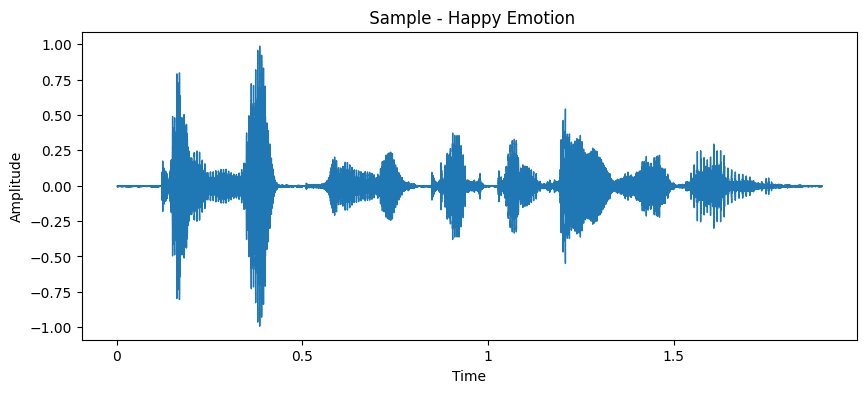

In [ ]:
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title(" Sample - Happy Emotion")
plt.ylabel("Amplitude")
plt.show()

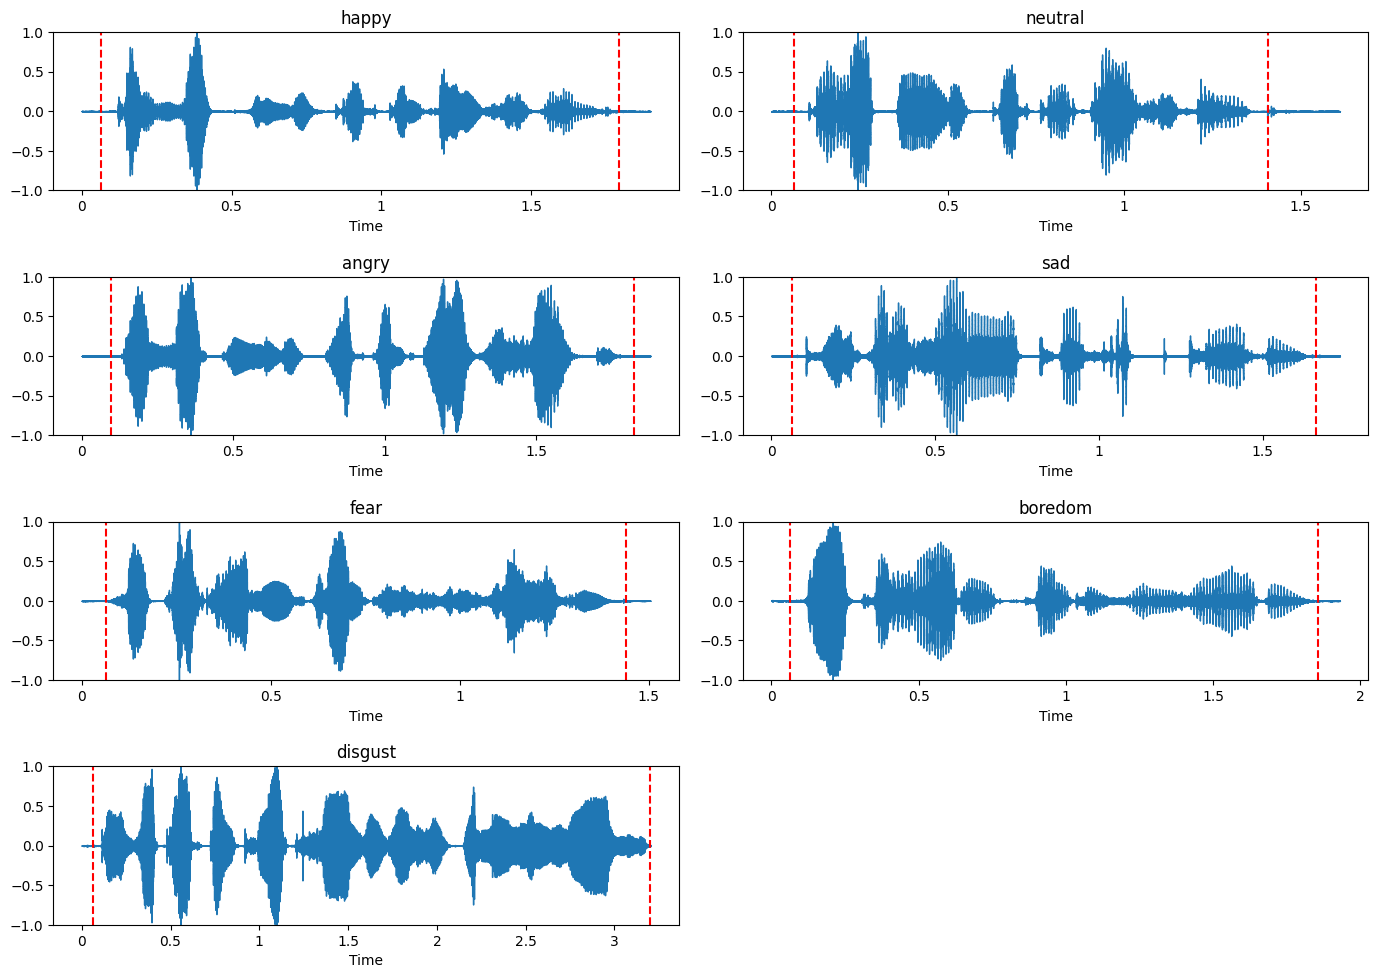

In [ ]:
emo_labs = {'W': 'angry', 'L': 'boredom', 'E': 'disgust', 'A': 'fear', 'F': 'happy', 'T': 'sad', 'N': 'neutral'}
plt.figure(figsize=(14, 10))
emos,i = [],1
for wav in os.listdir(dpath):
  if wav[5] not in emos:
    emos.append(wav[5])
    audio_path = os.path.join(dpath,wav)
    y, sr = librosa.load(audio_path,sr=16000)
    ytrim, index = librosa.effects.trim(y,top_db=25)
    plt.subplot(4,2,i)
    plt.title(emo_labs[wav[5]])
    plt.ylim(-1,1)
    dur = librosa.get_duration(y=y,sr=sr)
    plt.axvline(x=dur/len(y)*index[0], color='r', linestyle='--')
    plt.axvline(x=dur/len(y)*index[1], color='r', linestyle='--')
    librosa.display.waveshow(y, sr=sr)
    i+=1
  if len(emos)==7:
    break
plt.tight_layout(pad=1.5)
plt.show()

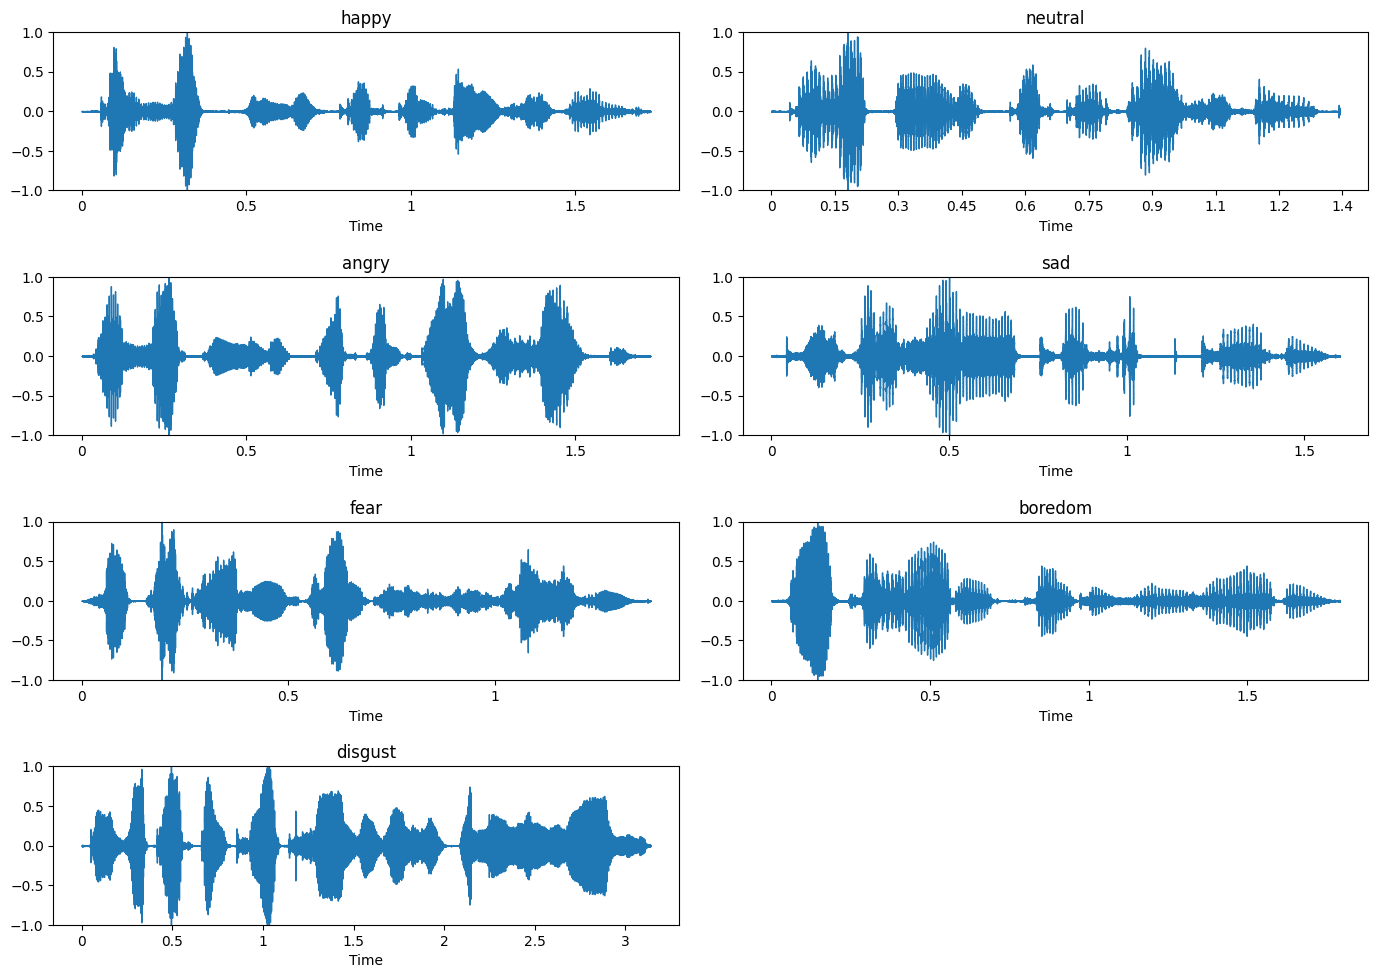

In [ ]:
plt.figure(figsize=(14, 10))
emos,i = [],1
for wav in os.listdir(dpath):
  if wav[5] not in emos:
    emos.append(wav[5])
    audio_path = os.path.join(dpath,wav)
    y, sr = librosa.load(audio_path,sr=16000)
    ytrim, index = librosa.effects.trim(y,top_db=25)
    plt.subplot(4,2,i)
    plt.title(emo_labs[wav[5]])
    plt.ylim(-1,1)
    librosa.display.waveshow(ytrim, sr=sr)
    i+=1
  if len(emos)==7:
    break
plt.tight_layout(pad=1.5)
plt.show()

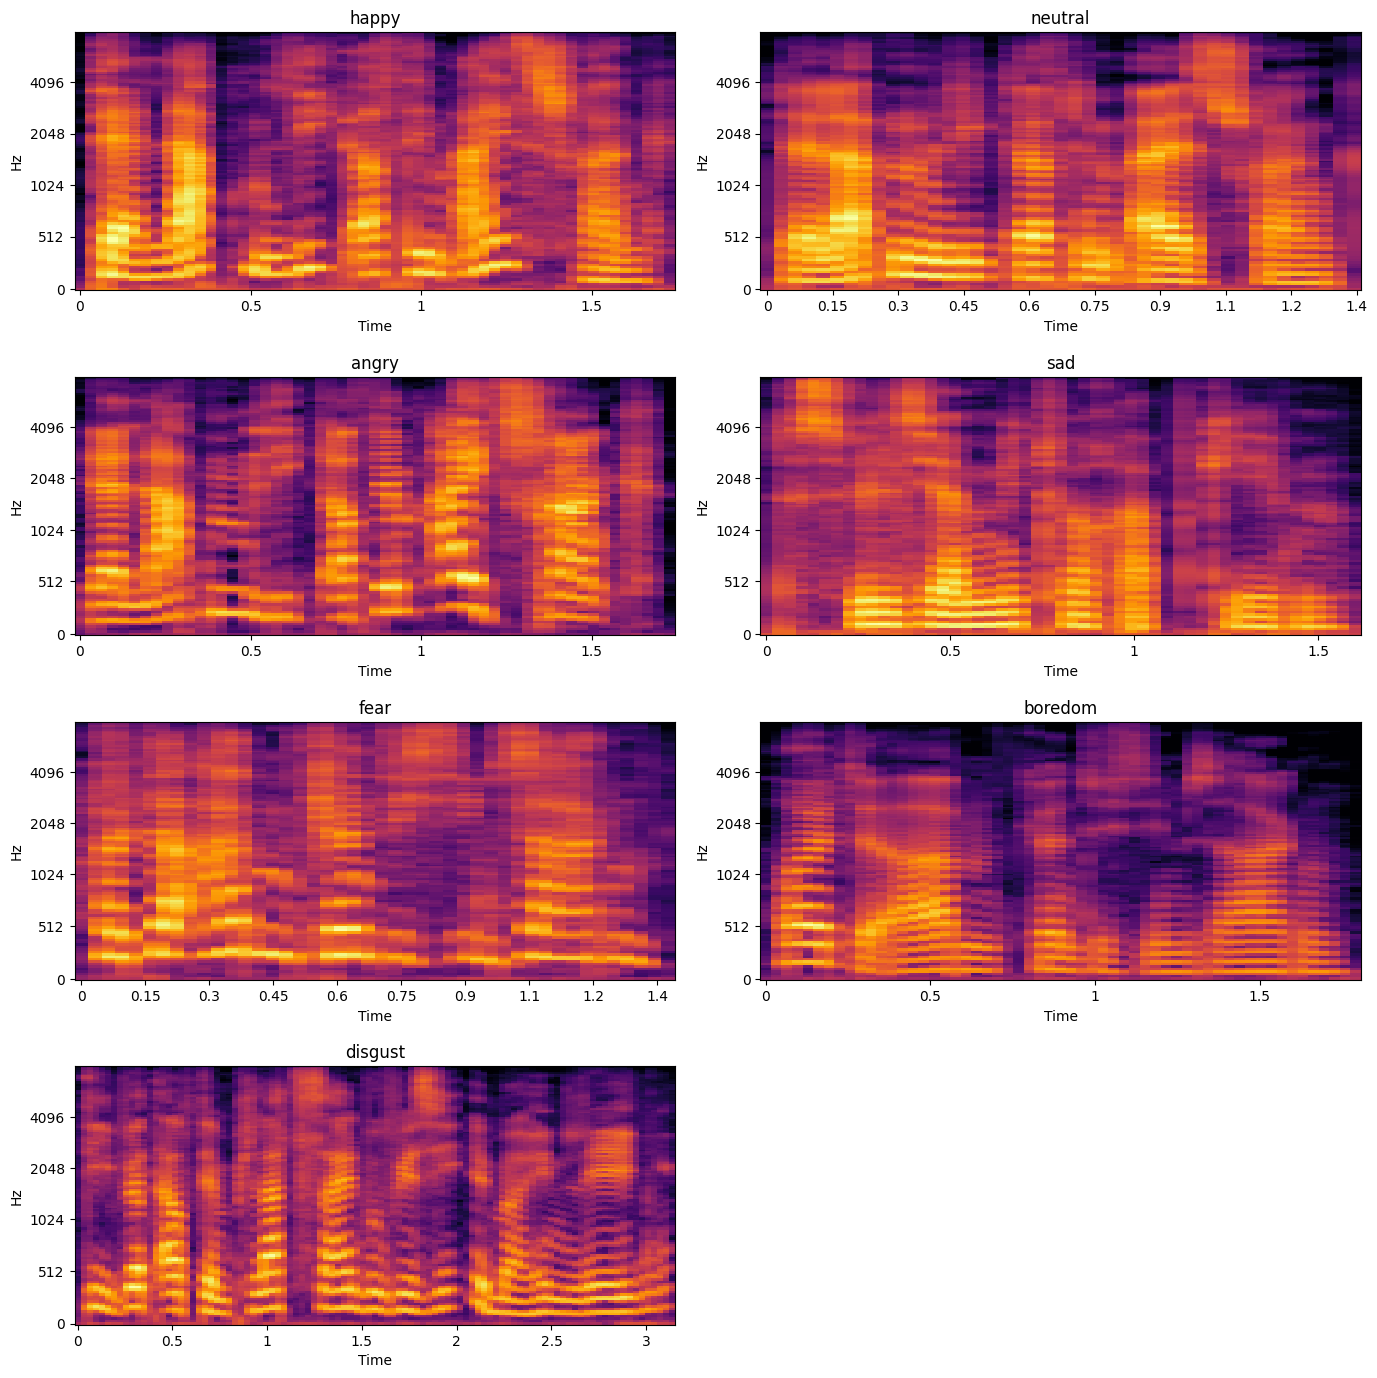

In [ ]:
plt.figure(figsize=(14, 14))
emos,i = [],1
for wav in os.listdir(dpath):
  if wav[5] not in emos:
    emos.append(wav[5])
    audio_path = os.path.join(dpath,wav)
    y, sr = librosa.load(audio_path,sr=16000)
    ytrim, index = librosa.effects.trim(y,top_db=25)
    plt.subplot(4,2,i)
    plt.title(emo_labs[wav[5]])
    S = librosa.feature.melspectrogram(y=ytrim, sr=sr, n_mels=128)
    S_dB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=sr,cmap='inferno')
    i+=1
  if len(emos)==7:
    break
plt.tight_layout(pad=1.5)
plt.show()

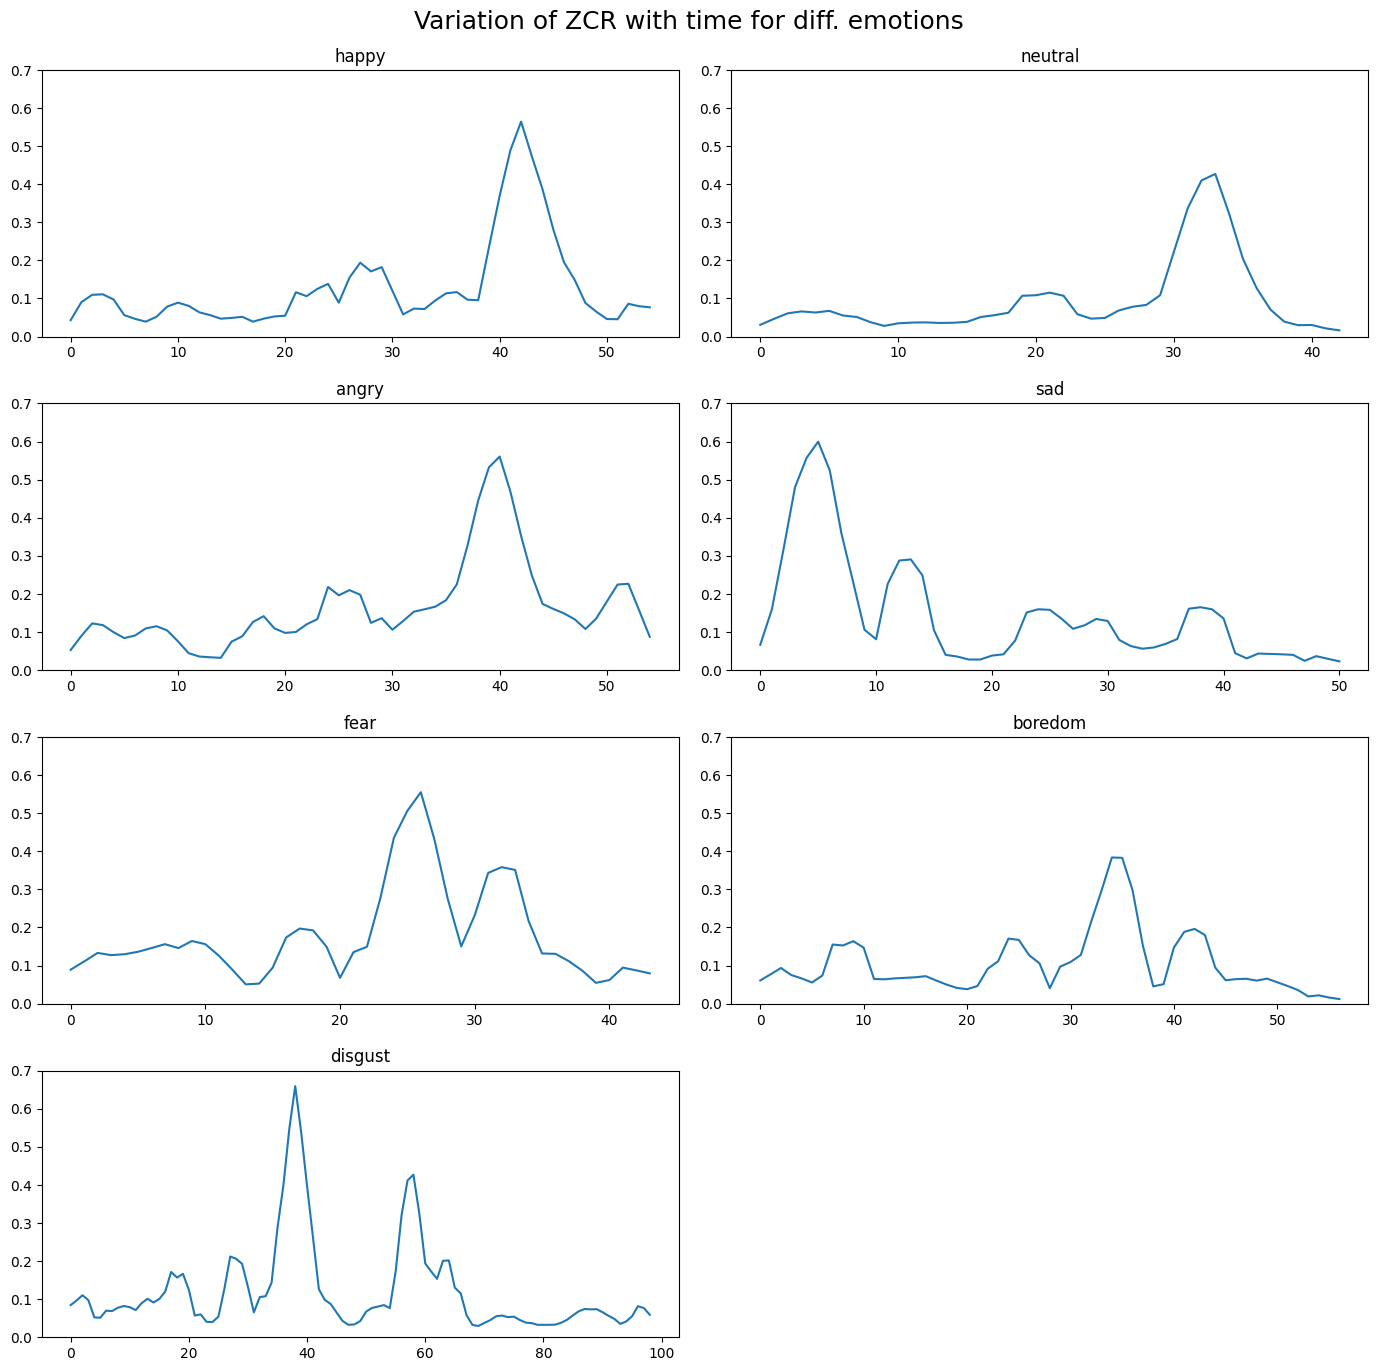

In [ ]:
plt.figure(figsize=(14, 14))
emos,i = [],1
for wav in os.listdir(dpath):
  if wav[5] not in emos:
    emos.append(wav[5])
    audio_path = os.path.join(dpath,wav)
    y, sr = librosa.load(audio_path,sr=16000)
    ytrim, index = librosa.effects.trim(y,top_db=25)
    plt.subplot(4,2,i)
    plt.title(emo_labs[wav[5]])
    zcr = librosa.feature.zero_crossing_rate(ytrim)
    plt.ylim(0,0.7)
    plt.plot(zcr[0])
    i+=1
  if len(emos)==7:
    break
plt.suptitle("Variation of ZCR with time for diff. emotions",fontsize=18)
plt.tight_layout(pad=1.5)
plt.show()

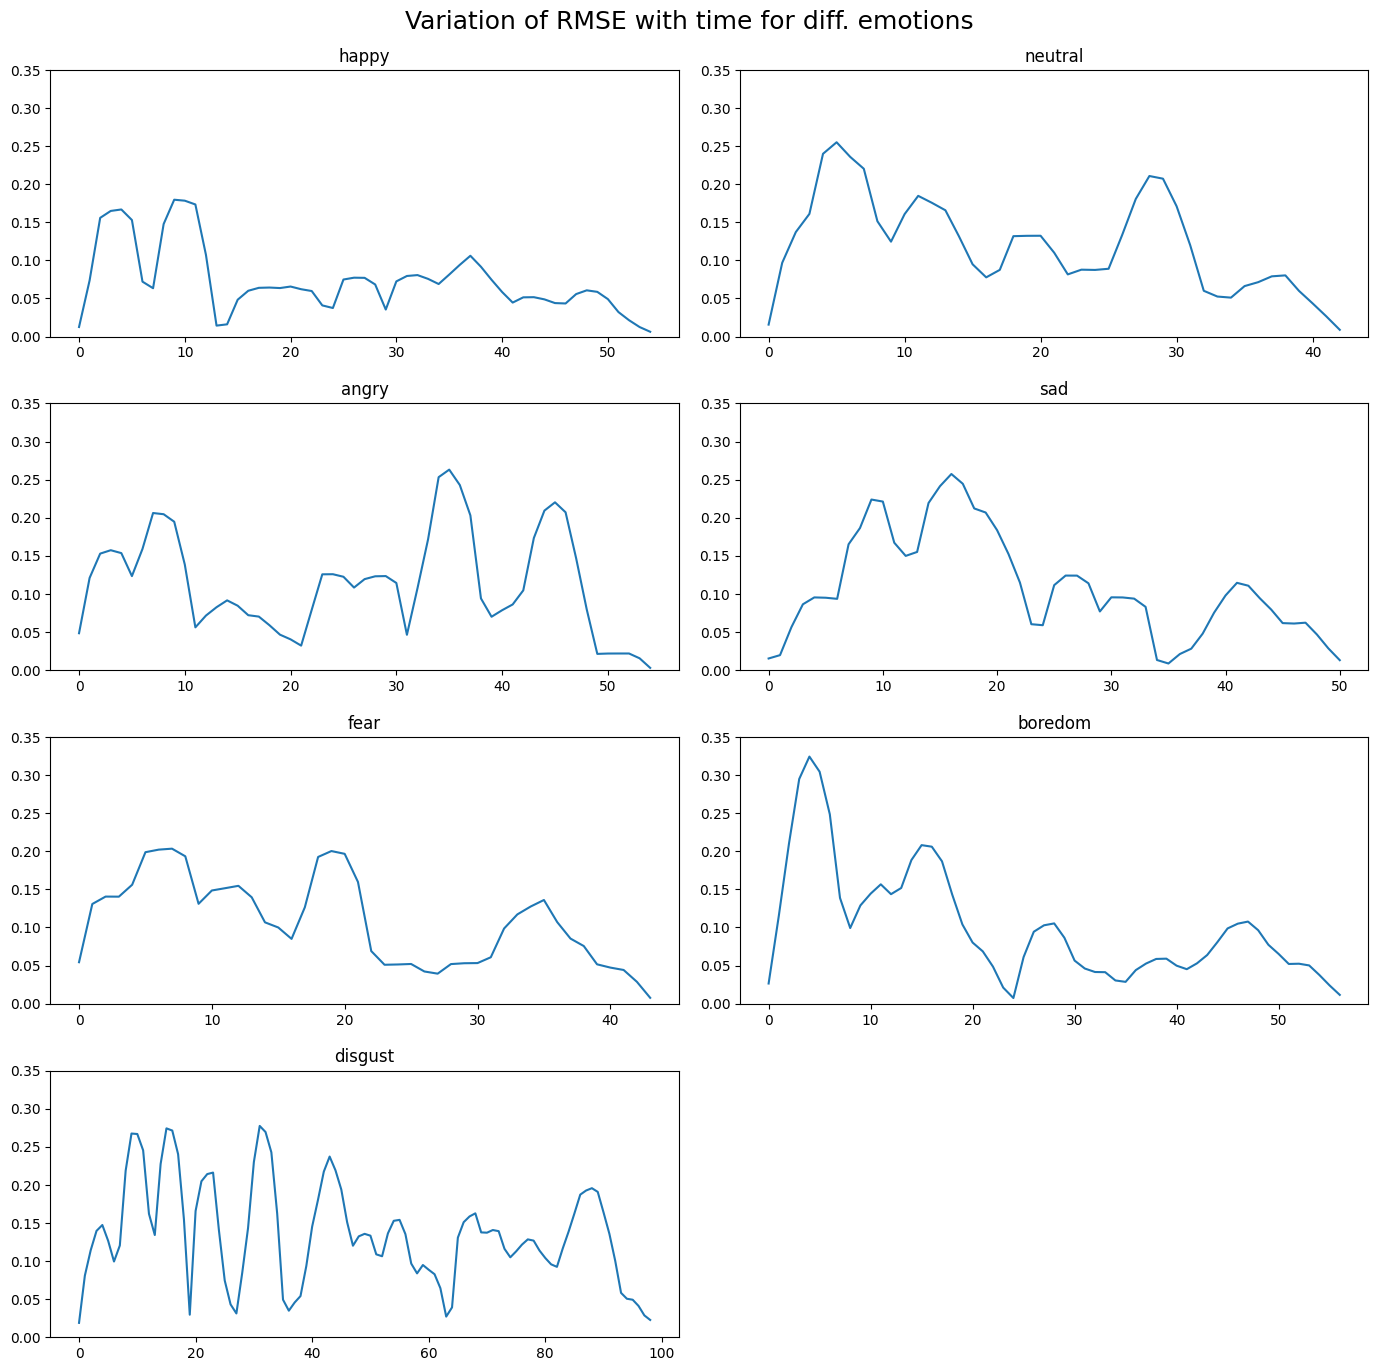

In [ ]:
plt.figure(figsize=(14, 14))
emos,i = [],1
for wav in os.listdir(dpath):
  if wav[5] not in emos:
    emos.append(wav[5])
    audio_path = os.path.join(dpath,wav)
    y, sr = librosa.load(audio_path,sr=16000)
    ytrim, index = librosa.effects.trim(y,top_db=25)
    plt.subplot(4,2,i)
    plt.title(emo_labs[wav[5]])
    rmse = librosa.feature.rms(y=ytrim)
    plt.ylim(0,0.35)
    plt.plot(rmse[0])
    i+=1
  if len(emos)==7:
    break
plt.suptitle("Variation of RMSE with time for diff. emotions",fontsize=18)
plt.tight_layout(pad=1.5)
plt.show()

In [ ]:
audio_path = os.path.join(dpath,"03a01Fa.wav")
y, sr = librosa.load(audio_path,sr=16000)
ytrim, index = librosa.effects.trim(y,top_db=25)
dur = librosa.get_duration(y=ytrim,sr=sr)
print("Duration:", dur)

mfcc = librosa.feature.mfcc(y=ytrim, sr=sr, n_mfcc=13)
print("MFCC:", mfcc.shape)

mfcc2 = librosa.feature.mfcc(y=ytrim, sr=sr, n_mfcc=20)
print("MFCC:", mfcc2.shape)

mfsp=librosa.feature.melspectrogram(y=ytrim, sr=sr)
print("MFSP:", mfsp.shape)

zcr = librosa.feature.zero_crossing_rate(ytrim)
print("Zero Crossing Rate:", zcr.shape)

rms = librosa.feature.rms(y=ytrim)
print("RMS:", rms.shape)

chroma_stft = librosa.feature.chroma_stft(y=ytrim, sr=sr)
print("Chroma STFT:", chroma_stft.shape)

spectral_contrast = librosa.feature.spectral_contrast(y=ytrim, sr=sr)
print("Spectral Contrast:", spectral_contrast.shape)

tonnetz = librosa.feature.tonnetz(y=librosa.effects.harmonic(ytrim), sr=sr)
print("Tonnetz:", tonnetz.shape)

Duration: 1.728
MFCC: (13, 55)
MFCC: (20, 55)
MFSP: (128, 55)
Zero Crossing Rate: (1, 55)
RMS: (1, 55)
Chroma STFT: (12, 55)
Spectral Contrast: (7, 55)
Tonnetz: (6, 55)


In [ ]:
pd.DataFrame(mfcc)

0           1          2           3           4           5   \
0  -549.727173 -224.194336 -86.132225  -35.817699  -70.023399 -145.340027   
1    52.918766   57.051510  87.760399  108.533493  119.760796  120.061234   
2    21.378939    9.972511  10.985044  -12.645468  -32.387741  -38.537613   
3    23.208828   42.805153  50.078548   37.475090   20.902851   28.167191   
4    11.755654    2.999535   1.669188   -1.950886   -9.078091  -12.930403   
5     9.026367    5.136192 -21.642365  -43.049721  -53.087765  -38.800510   
6    -3.584288  -14.267120 -28.916069  -36.867512  -36.741405  -29.266769   
7    11.500909   -0.322021  -3.763111   -6.071755   -6.535936    3.644015   
8    10.065201  -10.271715 -13.172392  -18.331614  -21.013668   -7.096172   
9     5.161190    0.881103  -1.778005    6.174421   14.115114   21.733660   
10    8.507915   -1.625559  -6.554136  -12.913908  -14.173153   -5.523726   
11   22.022724   20.319572  11.950459   12.460001   15.635018    9.788879   
12    9.752583    4.832539  -0.287315   -3.010185   -2.733855    1.692084   

            6           7           8           9   ...          45  \
0  -222.648178 -315.332275 -147.923813  -32.300091  ... -209.726303   
1   119.188629  111.161766  128.301437  134.290268  ...    1.224461   
2    -6.364206   34.903641  -39.538055  -72.431572  ...  -15.559586   
3    43.654732   35.408012   15.574783  -11.323719  ...   47.280510   
4    -2.963650   13.438406  -18.327663  -29.283207  ...  -11.179528   
5   -13.878603   19.357244  -15.938842   -5.351714  ...   30.329815   
6   -37.156345  -52.050217  -33.980820  -28.599102  ...  -15.341190   
7     9.773490    1.603729    3.242994    6.233980  ...  -12.144433   
8   -11.531775   -7.236537  -11.624400  -13.517920  ...    3.695369   
9    12.744754   -2.423278   23.191925   25.665901  ...   28.851749   
10  -10.413841  -15.082231  -26.983425  -33.774208  ...  -11.913166   
11    3.311461    3.165524    2.776947   -5.573436  ...   11.898519   
12    4.280671   -0.221075    5.846730   -3.847672  ...   -5.198319   

            46          47          48          49          50          51  \
0  -184.289871 -131.443268 -122.421768 -152.453018 -246.779892 -335.584869   
1   105.344421  111.377808  115.544960  128.758301  139.214996  136.018402   
2   -16.499872  -22.840248  -21.617199  -10.952309    2.736407   19.285084   
3     1.369125   -8.357428   -4.071322   -0.679933    7.700763   23.269161   
4   -22.630806  -23.111019  -16.135513   -7.828669    2.587754    3.661487   
5    12.393486    9.354528    8.712992    2.905037   -3.632241    3.322814   
6    -6.447952  -14.331274  -27.157894  -35.368736  -27.328854   -4.842295   
7   -14.050022   -4.720219   -3.321914  -10.719560   -8.887398   12.044052   
8     5.513383    0.314494    2.352297    8.149126   11.010321   -8.780165   
9    24.560863   23.754492   15.559412    5.760455   -5.859670  -18.574558   
10   -9.748188   -4.489836   -5.100857   -8.884865  -10.408797   -8.755995   
11   -4.571507   -6.625628  -12.373573  -15.382710  -12.184206   -3.024316   
12  -13.270918  -20.128571  -15.022428   -9.930495   -7.757625   -5.096002   

            52          53          54  
0  -286.181610 -287.003479 -365.186371  
1   114.886902   78.769852   46.844727  
2   -17.473377  -41.003578  -44.853848  
3    38.203506   40.581085   45.088165  
4     9.452461    6.297011    7.812527  
5    -6.187752   -5.436839   -3.077375  
6   -22.945713  -28.763559  -30.368912  
7     7.068816    3.521753    3.608791  
8    11.015821   14.771835   10.289713  
9    -5.882197    1.768033   -1.693230  
10   -2.173542    9.540684    8.575001  
11    9.879446   16.543251   17.035656  
12   -7.143519   -5.155530    2.800279  

[13 rows x 55 columns]

In [ ]:
pd.DataFrame(mfcc2)

0           1          2           3           4           5   \
0  -549.727173 -224.194336 -86.132225  -35.817699  -70.023399 -145.340027   
1    52.918766   57.051510  87.760399  108.533493  119.760796  120.061234   
2    21.378939    9.972511  10.985044  -12.645468  -32.387741  -38.537613   
3    23.208828   42.805153  50.078548   37.475090   20.902851   28.167191   
4    11.755654    2.999535   1.669188   -1.950886   -9.078091  -12.930403   
5     9.026367    5.136192 -21.642365  -43.049721  -53.087765  -38.800510   
6    -3.584288  -14.267120 -28.916069  -36.867512  -36.741405  -29.266769   
7    11.500909   -0.322021  -3.763111   -6.071755   -6.535936    3.644015   
8    10.065201  -10.271715 -13.172392  -18.331614  -21.013668   -7.096172   
9     5.161190    0.881103  -1.778005    6.174421   14.115114   21.733660   
10    8.507915   -1.625559  -6.554136  -12.913908  -14.173153   -5.523726   
11   22.022724   20.319572  11.950459   12.460001   15.635018    9.788879   
12    9.752583    4.832539  -0.287315   -3.010185   -2.733855    1.692084   
13   -6.129525    0.380165   2.069180   -5.203392  -10.620560  -12.288462   
14   -0.303653  -14.735950  -6.377904   -4.841352   -6.473678  -11.032120   
15    6.851354    8.790686  -3.141328  -13.562531  -16.945915   -9.995281   
16   11.443440   11.751293   4.458511    2.488943    1.268590    0.598560   
17    1.616337   -5.515510 -13.917430  -19.567467  -18.715973  -13.117859   
18   -0.009562   -2.198784  -5.431787   -3.570023   -1.626723   -0.550682   
19    5.996345   18.928534   9.131269    5.659781    4.077510    5.022050   

            6           7           8           9   ...          45  \
0  -222.648178 -315.332275 -147.923813  -32.300091  ... -209.726303   
1   119.188629  111.161766  128.301437  134.290268  ...    1.224461   
2    -6.364206   34.903641  -39.538055  -72.431572  ...  -15.559586   
3    43.654732   35.408012   15.574783  -11.323719  ...   47.280510   
4    -2.963650   13.438406  -18.327663  -29.283207  ...  -11.179528   
5   -13.878603   19.357244  -15.938842   -5.351714  ...   30.329815   
6   -37.156345  -52.050217  -33.980820  -28.599102  ...  -15.341190   
7     9.773490    1.603729    3.242994    6.233980  ...  -12.144433   
8   -11.531775   -7.236537  -11.624400  -13.517920  ...    3.695369   
9    12.744754   -2.423278   23.191925   25.665901  ...   28.851749   
10  -10.413841  -15.082231  -26.983425  -33.774208  ...  -11.913166   
11    3.311461    3.165524    2.776947   -5.573436  ...   11.898519   
12    4.280671   -0.221075    5.846730   -3.847672  ...   -5.198319   
13   -5.465528    9.461067   -1.144112   -1.658010  ...    7.650787   
14   -8.034769   -9.994129   -5.955746   -9.452953  ...    2.857876   
15    0.705956   -2.181144    3.392863    1.651693  ...    9.817961   
16    6.317586   17.717697    1.434819   -5.945037  ...   -5.980329   
17  -13.577858   -8.549415  -10.733210   -6.954634  ...    0.090446   
18    3.995159   -0.809789    1.206239   -2.496022  ...  -10.020013   
19   -1.752717   -0.557806   -1.694972   -0.487843  ...    5.835912   

            46          47          48          49          50          51  \
0  -184.289871 -131.443268 -122.421768 -152.453018 -246.779892 -335.584869   
1   105.344421  111.377808  115.544960  128.758301  139.214996  136.018402   
2   -16.499872  -22.840248  -21.617199  -10.952309    2.736407   19.285084   
3     1.369125   -8.357428   -4.071322   -0.679933    7.700763   23.269161   
4   -22.630806  -23.111019  -16.135513   -7.828669    2.587754    3.661487   
5    12.393486    9.354528    8.712992    2.905037   -3.632241    3.322814   
6    -6.447952  -14.331274  -27.157894  -35.368736  -27.328854   -4.842295   
7   -14.050022   -4.720219   -3.321914  -10.719560   -8.887398   12.044052   
8     5.513383    0.314494    2.352297    8.149126   11.010321   -8.780165   
9    24.560863   23.754492   15.559412    5.760455   -5.859670  -18.574558   
10   -9.748188   -4.489836   -5.100857   -8.

In [ ]:
from scipy.stats import skew, kurtosis
def compute_statistics(feature, name):
    stats = {}
    stats[f'{name}_mean'] = np.mean(feature)
    stats[f'{name}_std'] = np.std(feature)
    stats[f'{name}_median'] = np.median(feature)
    stats[f'{name}_min'] = np.min(feature)
    stats[f'{name}_max'] = np.max(feature)
    stats[f'{name}_range'] = np.max(feature) - np.min(feature)
    stats[f'{name}_skewness'] = skew(feature)
    stats[f'{name}_kurtosis'] = kurtosis(feature)
    stats[f'{name}_25_%tile'] = np.percentile(feature, 25)
    stats[f'{name}_75_%tile'] = np.percentile(feature, 75)
    return stats
def extract_features(audio, sr):
    features = {}
    audio, _ = librosa.effects.trim(audio,top_db=25)
    mfs=librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=128,fmax=8000).mean(axis=1)
    for i, value in enumerate(mfs):
        features[f'mfs{i+1}'] = value

    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=20).mean(axis=1)
    for i, value in enumerate(mfcc):
        features[f'mfcc{i+1}'] = value

    zcr = librosa.feature.zero_crossing_rate(audio)
    stats = compute_statistics(zcr[0], 'zcr')
    features.update(stats)

    rms = librosa.feature.rms(y=audio)
    stats = compute_statistics(rms[0], 'rms')
    features.update(stats)

    chroma = librosa.feature.chroma_stft(y=audio, sr=sr).mean(axis=1)
    for i, value in enumerate(chroma):
        features[f'chroma{i+1}'] = value

    spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sr).mean(axis=1)
    for i, value in enumerate(spectral_contrast):
        features[f'spectral_contrast{i+1}'] = value

    tonnetz = librosa.feature.tonnetz(y=librosa.effects.harmonic(audio), sr=sr).mean(axis=1)
    for i, value in enumerate(tonnetz):
        features[f'tonnetz{i+1}'] = value
    return features

In [ ]:
import warnings,tqdm
warnings.filterwarnings('ignore')
feats = []
for wav in tqdm.tqdm(os.listdir(dpath)):
    audio_path = os.path.join(dpath,wav)
    y, sr = librosa.load(audio_path,sr=16000)
    feat = extract_features(audio=y,sr=sr)
    label = emo_labs[wav[5]]
    feat['label'] = label
    feats.append(feat)
df = pd.DataFrame(feats)
df

100%|██████████| 535/535 [03:22<00:00,  2.64it/s]


mfs1      mfs2      mfs3       mfs4       mfs5       mfs6  \
0    0.213872  0.102090  0.090887   1.257758   2.270701   6.406219   
1    0.357942  0.185719  2.257908  15.372119  16.542055  31.762119   
2    0.020697  0.017038  0.014131   0.030520   0.063819   1.506716   
3    0.087606  0.050022  0.034882   0.019206   0.023292   0.856702   
4    0.556998  0.133099  2.486111  22.960217  46.629635  76.015778   
..        ...       ...       ...        ...        ...        ...   
530  0.171170  0.216475  0.147940   0.074751   0.086122   0.283577   
531  0.915826  0.642641  0.720327   0.487552   0.239672   0.393406   
532  0.603223  0.275524  0.220934   0.151671   0.190458  28.352022   
533  0.000619  0.000508  0.000536   0.000676   0.000991   0.000883   
534  0.005166  0.004690  0.006192   0.004188   0.003247   0.006824   

           mfs7        mfs8        mfs9       mfs10  ...  spectral_contrast5  \
0     11.820951   10.039133    8.405095   10.122995  ...           17.813053   
1     26.760712    5.890410   12.160147    7.236262  ...           17.984726   
2      3.039754    5.498095    8.211032   15.111133  ...           18.005453   
3      4.686006   11.320702   15.652591   13.851864  ...           18.263096   
4      5.946709    8.649186    4.704916   16.429609  ...           16.427454   
..          ...         ...         ...         ...  ...                 ...   
530    3.280869   15.577481   44.061363   53.666157  ...           18.207671   
531    9.041094  359.267822  465.566589  137.835327  ...           16.904528   
532  207.304077  185.598251   16.520781    0.495565  ...           15.880638   
533    0.007695    0.028077    0.131992    0.315783  ...           19.190806   
534    0.016406    0.084455    0.206275    0.674456  ...           19.348132   

     spectral_contrast6  spectral_contrast7  tonnetz1  tonnetz2  tonnetz3  \
0             16.997558           19.144154  0.001157  0.019221 -0.060937   
1             19.843641           18.454177 -0.011623  0.014094 -0.045006   
2             20.025895           17.455325 -0.009271  0.010508 -0.032510   
3             17.755779           18.319159  0.000570 -0.044210 -0.034926   
4             19.904993           17.233801 -0.004110 -0.080962 -0.068439   
..                  ...                 ...       ...       ...       ...   
530           19.464156           17.045317 -0.029963  0.006660 -0.020731   
531           19.493690           16.110924  0.026357  0.050051  0.104919   
532           18.133370           16.335688  0.060161  0.015662 -0.004029   
533           20.788739           17.529055  0.009313 -0.006189 -0.024897   
534           21.324245           17.704772 -0.004126  0.006379  0.043416   

     tonnetz4  tonnetz5  tonnetz6    label  
0    0.011255 -0.005811 -0.005814    happy  
1    0.112638 -0.034898 -0.006937  neutral  
2   -0.095437  0.012397  0.000373    angry  
3   -0.028225  0.022242  0.007522    happy  
4   -0.030369  0.020112  0.010972  neutral  
..        ...       ...       ...      ...  
530 -0.014048 -0.003789 -0.003878  disgust  
531  0.014105  0.031064 -0.016949      sad  
532  0.004883  0.000973 -0.023721      sad  
533 -0.014199 -0.009167  0.018344    angry  
534 -0.070196 -0.001585 -0.005230    angry  

[535 rows x 194 columns]

In [ ]:
df.to_csv('/content/drive/MyDrive/PBL_2_Files/EMO_DB_MFCC_etc_features.csv',index=False)

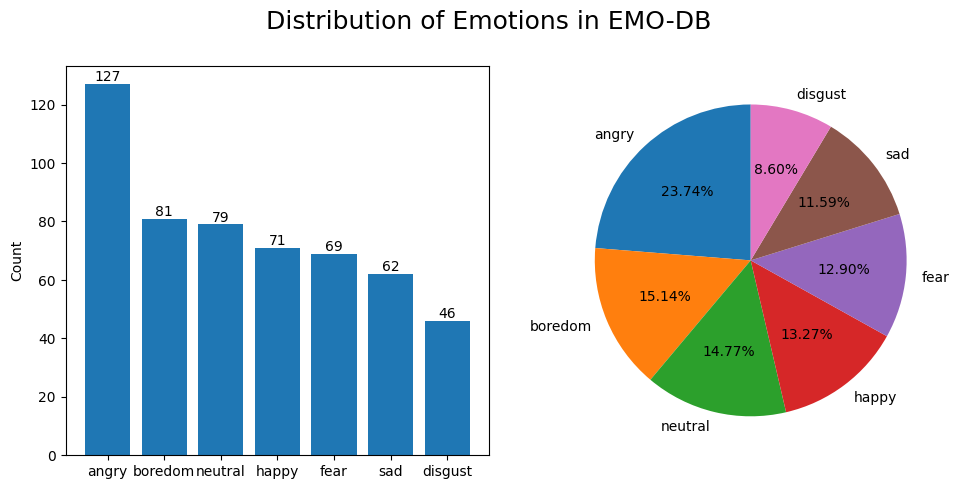

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PBL_2_Files/EMO_DB_MFCC_etc_features.csv')
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
bars = plt.bar(df['label'].value_counts().index, df['label'].value_counts().values)
plt.ylabel("Count")
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),bar.get_height(), ha='center', va='bottom')
plt.subplot(1, 2, 2)
df['label'].value_counts().plot(kind='pie',autopct='%1.2f%%',startangle=90)
plt.ylabel('')
plt.suptitle('Distribution of Emotions in EMO-DB', fontsize=18)
plt.tight_layout(pad=1.5)
plt.show()

In [ ]:
st = ""
for c in df.columns:
  st += c+" "
print(st)

mfs1 mfs2 mfs3 mfs4 mfs5 mfs6 mfs7 mfs8 mfs9 mfs10 mfs11 mfs12 mfs13 mfs14 mfs15 mfs16 mfs17 mfs18 mfs19 mfs20 mfs21 mfs22 mfs23 mfs24 mfs25 mfs26 mfs27 mfs28 mfs29 mfs30 mfs31 mfs32 mfs33 mfs34 mfs35 mfs36 mfs37 mfs38 mfs39 mfs40 mfs41 mfs42 mfs43 mfs44 mfs45 mfs46 mfs47 mfs48 mfs49 mfs50 mfs51 mfs52 mfs53 mfs54 mfs55 mfs56 mfs57 mfs58 mfs59 mfs60 mfs61 mfs62 mfs63 mfs64 mfs65 mfs66 mfs67 mfs68 mfs69 mfs70 mfs71 mfs72 mfs73 mfs74 mfs75 mfs76 mfs77 mfs78 mfs79 mfs80 mfs81 mfs82 mfs83 mfs84 mfs85 mfs86 mfs87 mfs88 mfs89 mfs90 mfs91 mfs92 mfs93 mfs94 mfs95 mfs96 mfs97 mfs98 mfs99 mfs100 mfs101 mfs102 mfs103 mfs104 mfs105 mfs106 mfs107 mfs108 mfs109 mfs110 mfs111 mfs112 mfs113 mfs114 mfs115 mfs116 mfs117 mfs118 mfs119 mfs120 mfs121 mfs122 mfs123 mfs124 mfs125 mfs126 mfs127 mfs128 mfcc1 mfcc2 mfcc3 mfcc4 mfcc5 mfcc6 mfcc7 mfcc8 mfcc9 mfcc10 mfcc11 mfcc12 mfcc13 mfcc14 mfcc15 mfcc16 mfcc17 mfcc18 mfcc19 mfcc20 zcr_mean zcr_std zcr_median zcr_min zcr_max zcr_range zcr_skewness zcr_kurtosis z

In [ ]:
xmfs = df[[c for c in df.columns if c.startswith("mfs")]]
xmfcc = df[[c for c in df.columns if c.startswith("mfcc")]]
xzcr = df[[c for c in df.columns if c.startswith("zcr")]]
xrmse = df[[c for c in df.columns if c.startswith("rms")]]
xchr = df[[c for c in df.columns if c.startswith("chroma")]]
xspc = df[[c for c in df.columns if c.startswith("spectral_contrast")]]
xton = df[[c for c in df.columns if c.startswith("tonnetz")]]
xall = df.drop('label',axis=1)
y = df['label']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def scale_n_split(feat,y,printshapes=True):
    trainX, testX, trainY, testY = train_test_split(feat, y, test_size=0.2, random_state=42,stratify=y)
    if printshapes:
      print("Samples in Training set =",trainX.shape[0])
      print("Samples in Testing set =",testX.shape[0])
    scaler = StandardScaler()
    trainX = scaler.fit_transform(trainX)
    testX = scaler.transform(testX)
    return trainX, testX, trainY, testY
def evaluatemodel(model, trainX, trainY, testX, testY,name,printany=True):
    model.fit(trainX, trainY)
    predictions = model.predict(testX)
    acc = accuracy_score(testY, predictions)
    if printany:
      cm = confusion_matrix(testY, predictions)
      ConfusionMatrixDisplay(cm, display_labels=model.classes_).plot(cmap='Blues')
      plt.title(f"{name} Confusion Matrix")
      plt.show()
      print(f"{name} Accuracy: {acc*100:.3f}%")
      print(classification_report(testY, predictions))
    return acc
def traintestmodel(feat,y,title,rs=42,printany=True):
    trainX, testX, trainY, testY = scale_n_split(feat,y)
    mnames = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN']
    models = [LogisticRegression(random_state=rs),
              DecisionTreeClassifier(random_state=rs),
              RandomForestClassifier(n_estimators=400,random_state=rs),
              SVC(random_state=rs),
              KNeighborsClassifier()
              ]
    accuracies = []
    for mname, model in zip(mnames, models):
       accuracies.append(evaluatemodel(model,trainX,trainY,testX,testY,mname,printany=printany))
    print(f"\nAvg Accuracy = {np.mean(accuracies)*100:.3f}%\n")
    if printany:
      plt.figure(figsize=(8, 4))
      bars = plt.bar(mnames, accuracies)
      for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, f'{height*100:.2f}%', ha='center', va='bottom')
      plt.title(f'Accuracy Comparison of Different Models using {title} features')
      plt.xlabel('Models')
      plt.ylabel('Accuracy')
      plt.ylim(0, 1)
      plt.show()
    return dict(zip(mnames,accuracies))

Samples in Training set = 428
Samples in Testing set = 107


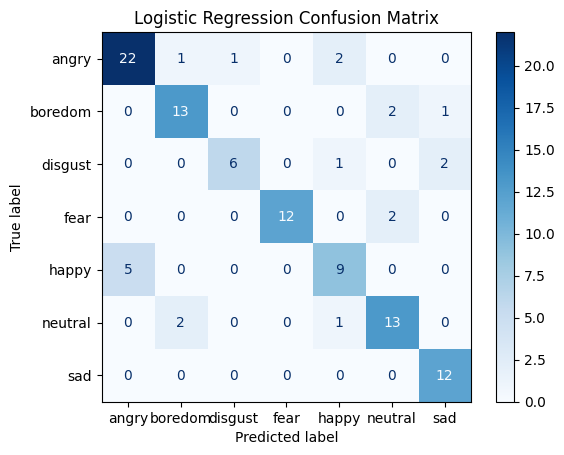

Logistic Regression Accuracy: 81.308%
              precision    recall  f1-score   support

       angry       0.81      0.85      0.83        26
     boredom       0.81      0.81      0.81        16
     disgust       0.86      0.67      0.75         9
        fear       1.00      0.86      0.92        14
       happy       0.69      0.64      0.67        14
     neutral       0.76      0.81      0.79        16
         sad       0.80      1.00      0.89        12

    accuracy                           0.81       107
   macro avg       0.82      0.81      0.81       107
weighted avg       0.82      0.81      0.81       107



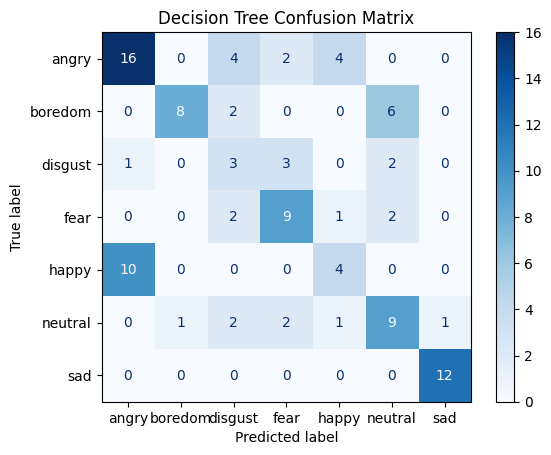

Decision Tree Accuracy: 57.009%
              precision    recall  f1-score   support

       angry       0.59      0.62      0.60        26
     boredom       0.89      0.50      0.64        16
     disgust       0.23      0.33      0.27         9
        fear       0.56      0.64      0.60        14
       happy       0.40      0.29      0.33        14
     neutral       0.47      0.56      0.51        16
         sad       0.92      1.00      0.96        12

    accuracy                           0.57       107
   macro avg       0.58      0.56      0.56       107
weighted avg       0.60      0.57      0.57       107



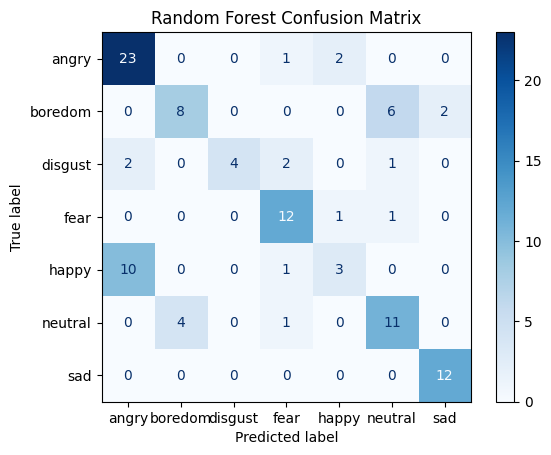

Random Forest Accuracy: 68.224%
              precision    recall  f1-score   support

       angry       0.66      0.88      0.75        26
     boredom       0.67      0.50      0.57        16
     disgust       1.00      0.44      0.62         9
        fear       0.71      0.86      0.77        14
       happy       0.50      0.21      0.30        14
     neutral       0.58      0.69      0.63        16
         sad       0.86      1.00      0.92        12

    accuracy                           0.68       107
   macro avg       0.71      0.66      0.65       107
weighted avg       0.68      0.68      0.66       107



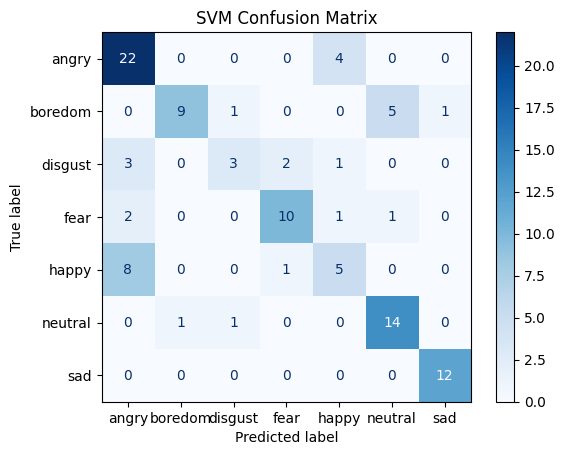

SVM Accuracy: 70.093%
              precision    recall  f1-score   support

       angry       0.63      0.85      0.72        26
     boredom       0.90      0.56      0.69        16
     disgust       0.60      0.33      0.43         9
        fear       0.77      0.71      0.74        14
       happy       0.45      0.36      0.40        14
     neutral       0.70      0.88      0.78        16
         sad       0.92      1.00      0.96        12

    accuracy                           0.70       107
   macro avg       0.71      0.67      0.67       107
weighted avg       0.71      0.70      0.69       107



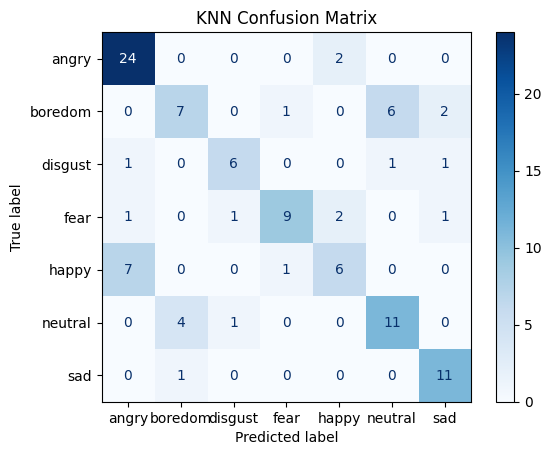

KNN Accuracy: 69.159%
              precision    recall  f1-score   support

       angry       0.73      0.92      0.81        26
     boredom       0.58      0.44      0.50        16
     disgust       0.75      0.67      0.71         9
        fear       0.82      0.64      0.72        14
       happy       0.60      0.43      0.50        14
     neutral       0.61      0.69      0.65        16
         sad       0.73      0.92      0.81        12

    accuracy                           0.69       107
   macro avg       0.69      0.67      0.67       107
weighted avg       0.69      0.69      0.68       107


Avg Accuracy = 69.159%



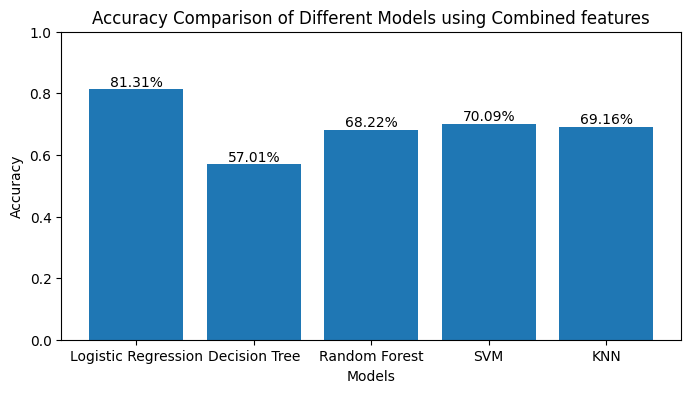

In [ ]:
acc_comb = traintestmodel(xall,y,'Combined')

Samples in Training set = 428
Samples in Testing set = 107


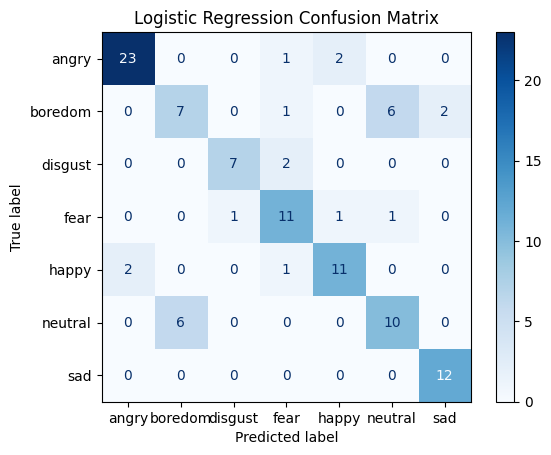

Logistic Regression Accuracy: 75.701%
              precision    recall  f1-score   support

       angry       0.92      0.88      0.90        26
     boredom       0.54      0.44      0.48        16
     disgust       0.88      0.78      0.82         9
        fear       0.69      0.79      0.73        14
       happy       0.79      0.79      0.79        14
     neutral       0.59      0.62      0.61        16
         sad       0.86      1.00      0.92        12

    accuracy                           0.76       107
   macro avg       0.75      0.76      0.75       107
weighted avg       0.75      0.76      0.75       107



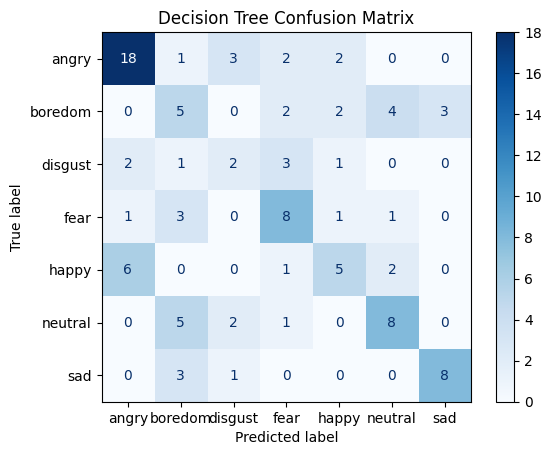

Decision Tree Accuracy: 50.467%
              precision    recall  f1-score   support

       angry       0.67      0.69      0.68        26
     boredom       0.28      0.31      0.29        16
     disgust       0.25      0.22      0.24         9
        fear       0.47      0.57      0.52        14
       happy       0.45      0.36      0.40        14
     neutral       0.53      0.50      0.52        16
         sad       0.73      0.67      0.70        12

    accuracy                           0.50       107
   macro avg       0.48      0.47      0.48       107
weighted avg       0.51      0.50      0.50       107



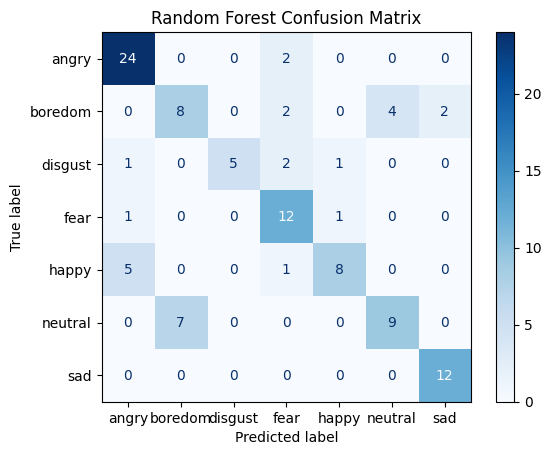

Random Forest Accuracy: 72.897%
              precision    recall  f1-score   support

       angry       0.77      0.92      0.84        26
     boredom       0.53      0.50      0.52        16
     disgust       1.00      0.56      0.71         9
        fear       0.63      0.86      0.73        14
       happy       0.80      0.57      0.67        14
     neutral       0.69      0.56      0.62        16
         sad       0.86      1.00      0.92        12

    accuracy                           0.73       107
   macro avg       0.76      0.71      0.72       107
weighted avg       0.74      0.73      0.72       107



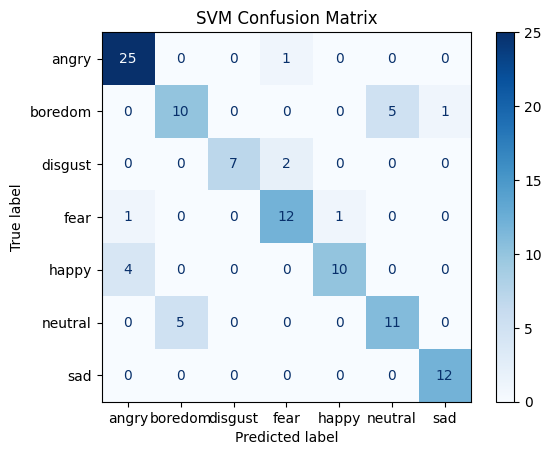

SVM Accuracy: 81.308%
              precision    recall  f1-score   support

       angry       0.83      0.96      0.89        26
     boredom       0.67      0.62      0.65        16
     disgust       1.00      0.78      0.88         9
        fear       0.80      0.86      0.83        14
       happy       0.91      0.71      0.80        14
     neutral       0.69      0.69      0.69        16
         sad       0.92      1.00      0.96        12

    accuracy                           0.81       107
   macro avg       0.83      0.80      0.81       107
weighted avg       0.82      0.81      0.81       107



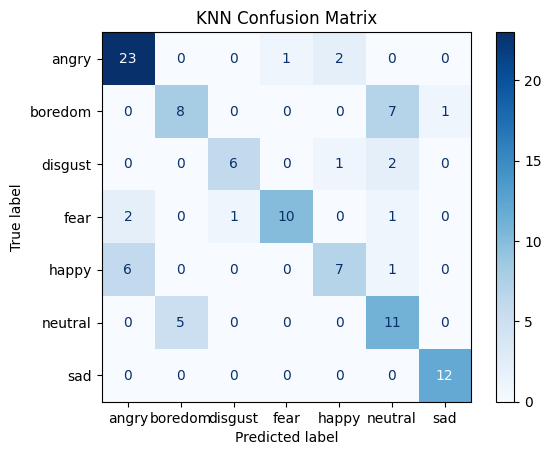

KNN Accuracy: 71.963%
              precision    recall  f1-score   support

       angry       0.74      0.88      0.81        26
     boredom       0.62      0.50      0.55        16
     disgust       0.86      0.67      0.75         9
        fear       0.91      0.71      0.80        14
       happy       0.70      0.50      0.58        14
     neutral       0.50      0.69      0.58        16
         sad       0.92      1.00      0.96        12

    accuracy                           0.72       107
   macro avg       0.75      0.71      0.72       107
weighted avg       0.73      0.72      0.72       107


Avg Accuracy = 70.467%



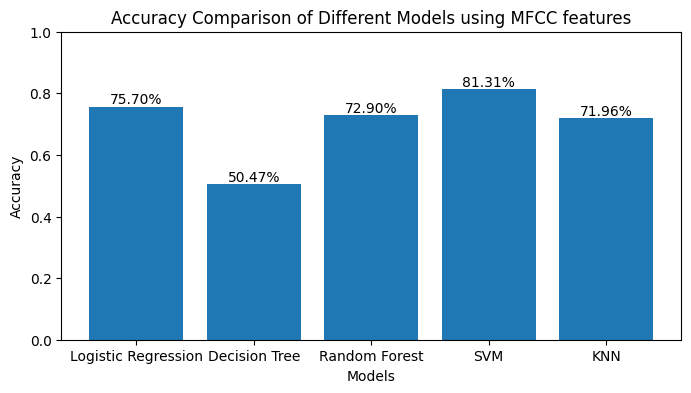

In [ ]:
acc_mfcc = traintestmodel(xmfcc,y,'MFCC')

Samples in Training set = 428
Samples in Testing set = 107


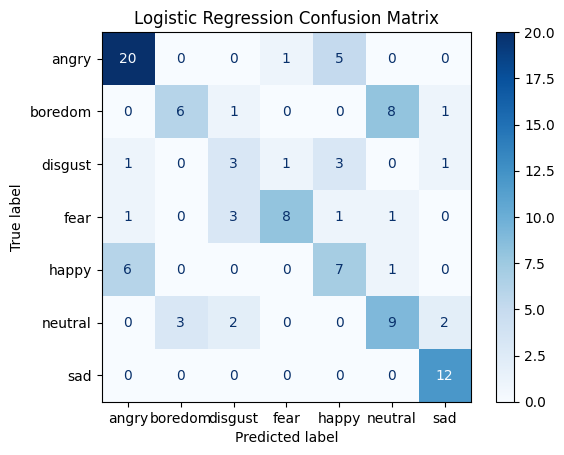

Logistic Regression Accuracy: 60.748%
              precision    recall  f1-score   support

       angry       0.71      0.77      0.74        26
     boredom       0.67      0.38      0.48        16
     disgust       0.33      0.33      0.33         9
        fear       0.80      0.57      0.67        14
       happy       0.44      0.50      0.47        14
     neutral       0.47      0.56      0.51        16
         sad       0.75      1.00      0.86        12

    accuracy                           0.61       107
   macro avg       0.60      0.59      0.58       107
weighted avg       0.62      0.61      0.60       107



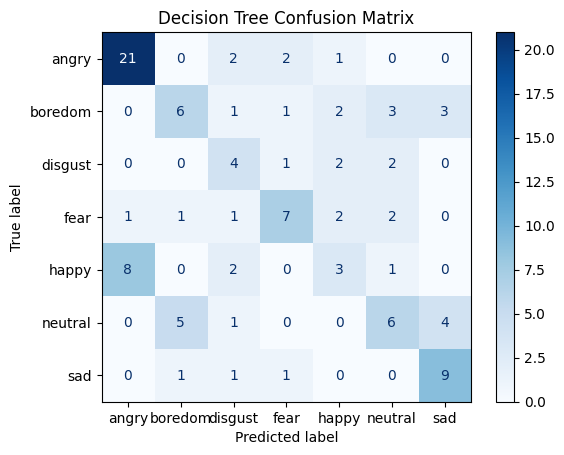

Decision Tree Accuracy: 52.336%
              precision    recall  f1-score   support

       angry       0.70      0.81      0.75        26
     boredom       0.46      0.38      0.41        16
     disgust       0.33      0.44      0.38         9
        fear       0.58      0.50      0.54        14
       happy       0.30      0.21      0.25        14
     neutral       0.43      0.38      0.40        16
         sad       0.56      0.75      0.64        12

    accuracy                           0.52       107
   macro avg       0.48      0.50      0.48       107
weighted avg       0.51      0.52      0.51       107



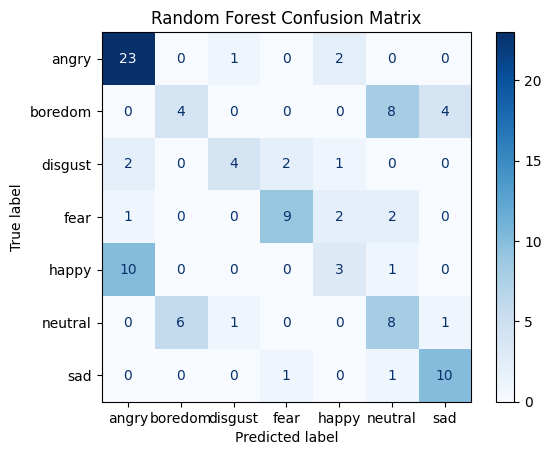

Random Forest Accuracy: 57.009%
              precision    recall  f1-score   support

       angry       0.64      0.88      0.74        26
     boredom       0.40      0.25      0.31        16
     disgust       0.67      0.44      0.53         9
        fear       0.75      0.64      0.69        14
       happy       0.38      0.21      0.27        14
     neutral       0.40      0.50      0.44        16
         sad       0.67      0.83      0.74        12

    accuracy                           0.57       107
   macro avg       0.56      0.54      0.53       107
weighted avg       0.55      0.57      0.55       107



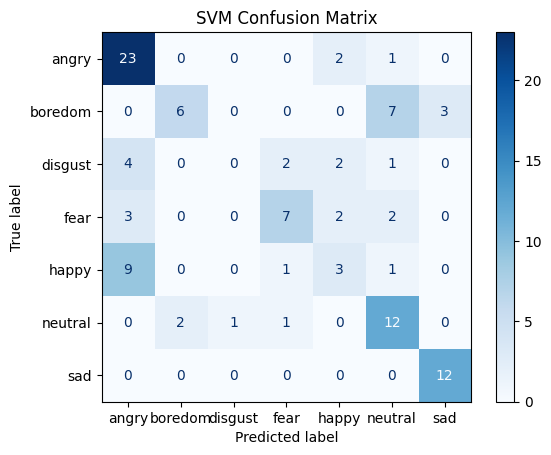

SVM Accuracy: 58.879%
              precision    recall  f1-score   support

       angry       0.59      0.88      0.71        26
     boredom       0.75      0.38      0.50        16
     disgust       0.00      0.00      0.00         9
        fear       0.64      0.50      0.56        14
       happy       0.33      0.21      0.26        14
     neutral       0.50      0.75      0.60        16
         sad       0.80      1.00      0.89        12

    accuracy                           0.59       107
   macro avg       0.52      0.53      0.50       107
weighted avg       0.55      0.59      0.54       107



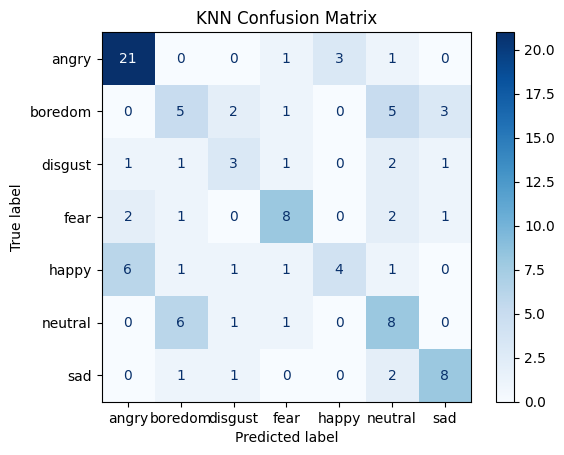

KNN Accuracy: 53.271%
              precision    recall  f1-score   support

       angry       0.70      0.81      0.75        26
     boredom       0.33      0.31      0.32        16
     disgust       0.38      0.33      0.35         9
        fear       0.62      0.57      0.59        14
       happy       0.57      0.29      0.38        14
     neutral       0.38      0.50      0.43        16
         sad       0.62      0.67      0.64        12

    accuracy                           0.53       107
   macro avg       0.51      0.50      0.50       107
weighted avg       0.53      0.53      0.52       107


Avg Accuracy = 56.449%



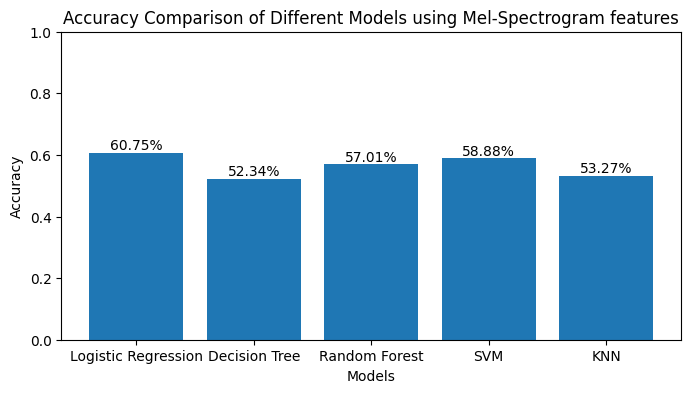

In [ ]:
acc_mfs = traintestmodel(xmfs,y,'Mel-Spectrogram')

Samples in Training set = 428
Samples in Testing set = 107


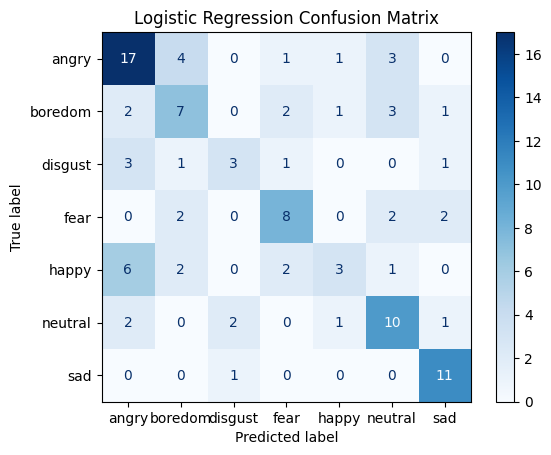

Logistic Regression Accuracy: 55.140%
              precision    recall  f1-score   support

       angry       0.57      0.65      0.61        26
     boredom       0.44      0.44      0.44        16
     disgust       0.50      0.33      0.40         9
        fear       0.57      0.57      0.57        14
       happy       0.50      0.21      0.30        14
     neutral       0.53      0.62      0.57        16
         sad       0.69      0.92      0.79        12

    accuracy                           0.55       107
   macro avg       0.54      0.54      0.52       107
weighted avg       0.54      0.55      0.53       107



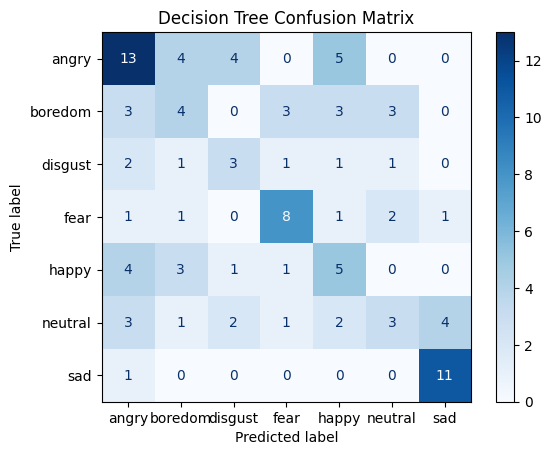

Decision Tree Accuracy: 43.925%
              precision    recall  f1-score   support

       angry       0.48      0.50      0.49        26
     boredom       0.29      0.25      0.27        16
     disgust       0.30      0.33      0.32         9
        fear       0.57      0.57      0.57        14
       happy       0.29      0.36      0.32        14
     neutral       0.33      0.19      0.24        16
         sad       0.69      0.92      0.79        12

    accuracy                           0.44       107
   macro avg       0.42      0.45      0.43       107
weighted avg       0.43      0.44      0.43       107



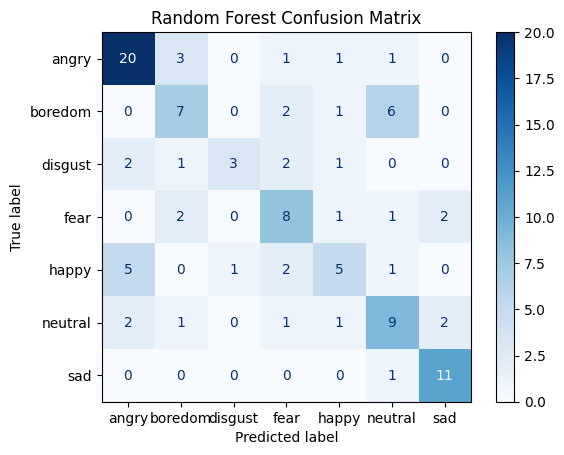

Random Forest Accuracy: 58.879%
              precision    recall  f1-score   support

       angry       0.69      0.77      0.73        26
     boredom       0.50      0.44      0.47        16
     disgust       0.75      0.33      0.46         9
        fear       0.50      0.57      0.53        14
       happy       0.50      0.36      0.42        14
     neutral       0.47      0.56      0.51        16
         sad       0.73      0.92      0.81        12

    accuracy                           0.59       107
   macro avg       0.59      0.56      0.56       107
weighted avg       0.59      0.59      0.58       107



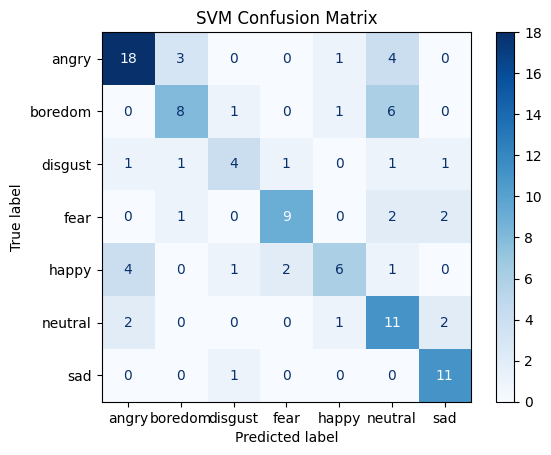

SVM Accuracy: 62.617%
              precision    recall  f1-score   support

       angry       0.72      0.69      0.71        26
     boredom       0.62      0.50      0.55        16
     disgust       0.57      0.44      0.50         9
        fear       0.75      0.64      0.69        14
       happy       0.67      0.43      0.52        14
     neutral       0.44      0.69      0.54        16
         sad       0.69      0.92      0.79        12

    accuracy                           0.63       107
   macro avg       0.64      0.62      0.61       107
weighted avg       0.64      0.63      0.62       107



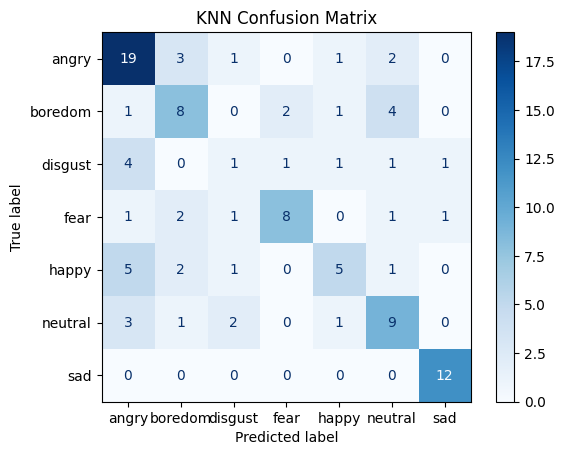

KNN Accuracy: 57.944%
              precision    recall  f1-score   support

       angry       0.58      0.73      0.64        26
     boredom       0.50      0.50      0.50        16
     disgust       0.17      0.11      0.13         9
        fear       0.73      0.57      0.64        14
       happy       0.56      0.36      0.43        14
     neutral       0.50      0.56      0.53        16
         sad       0.86      1.00      0.92        12

    accuracy                           0.58       107
   macro avg       0.55      0.55      0.54       107
weighted avg       0.57      0.58      0.57       107


Avg Accuracy = 55.701%



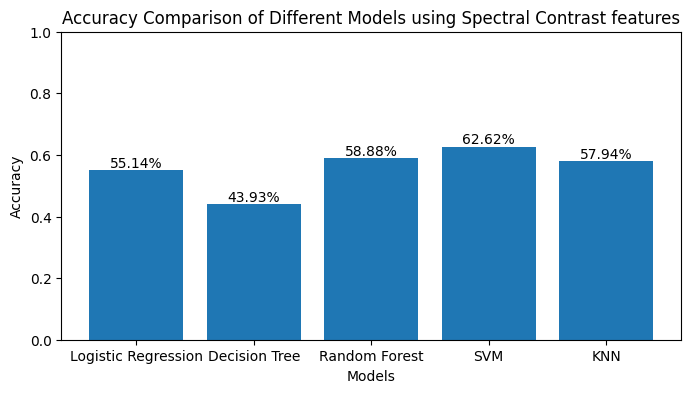

In [ ]:
acc_spc = traintestmodel(xspc,y,'Spectral Contrast')

Samples in Training set = 428
Samples in Testing set = 107


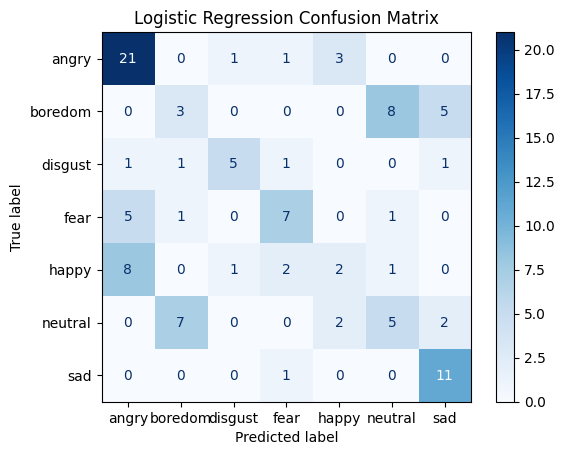

Logistic Regression Accuracy: 50.467%
              precision    recall  f1-score   support

       angry       0.60      0.81      0.69        26
     boredom       0.25      0.19      0.21        16
     disgust       0.71      0.56      0.62         9
        fear       0.58      0.50      0.54        14
       happy       0.29      0.14      0.19        14
     neutral       0.33      0.31      0.32        16
         sad       0.58      0.92      0.71        12

    accuracy                           0.50       107
   macro avg       0.48      0.49      0.47       107
weighted avg       0.47      0.50      0.48       107



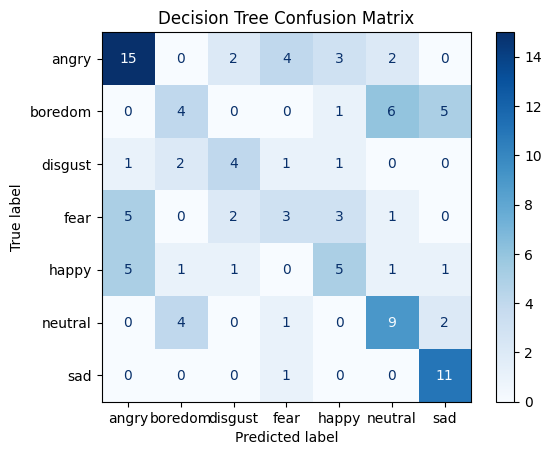

Decision Tree Accuracy: 47.664%
              precision    recall  f1-score   support

       angry       0.58      0.58      0.58        26
     boredom       0.36      0.25      0.30        16
     disgust       0.44      0.44      0.44         9
        fear       0.30      0.21      0.25        14
       happy       0.38      0.36      0.37        14
     neutral       0.47      0.56      0.51        16
         sad       0.58      0.92      0.71        12

    accuracy                           0.48       107
   macro avg       0.45      0.47      0.45       107
weighted avg       0.46      0.48      0.46       107



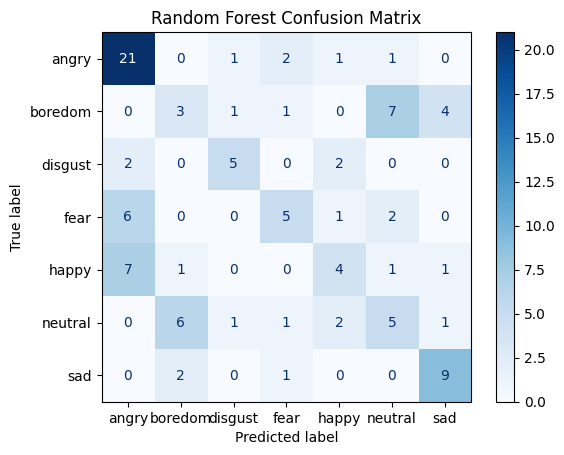

Random Forest Accuracy: 48.598%
              precision    recall  f1-score   support

       angry       0.58      0.81      0.68        26
     boredom       0.25      0.19      0.21        16
     disgust       0.62      0.56      0.59         9
        fear       0.50      0.36      0.42        14
       happy       0.40      0.29      0.33        14
     neutral       0.31      0.31      0.31        16
         sad       0.60      0.75      0.67        12

    accuracy                           0.49       107
   macro avg       0.47      0.47      0.46       107
weighted avg       0.46      0.49      0.47       107



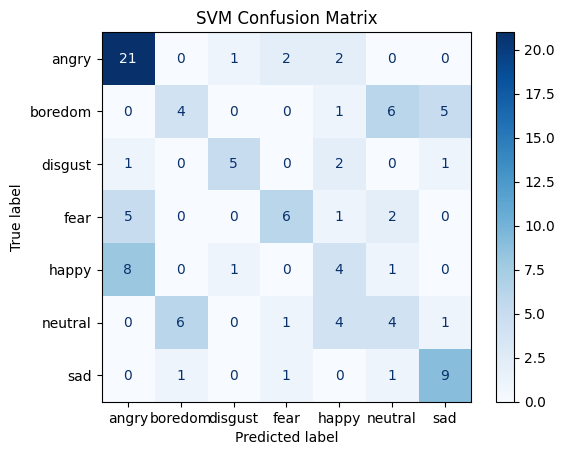

SVM Accuracy: 49.533%
              precision    recall  f1-score   support

       angry       0.60      0.81      0.69        26
     boredom       0.36      0.25      0.30        16
     disgust       0.71      0.56      0.62         9
        fear       0.60      0.43      0.50        14
       happy       0.29      0.29      0.29        14
     neutral       0.29      0.25      0.27        16
         sad       0.56      0.75      0.64        12

    accuracy                           0.50       107
   macro avg       0.49      0.48      0.47       107
weighted avg       0.48      0.50      0.48       107



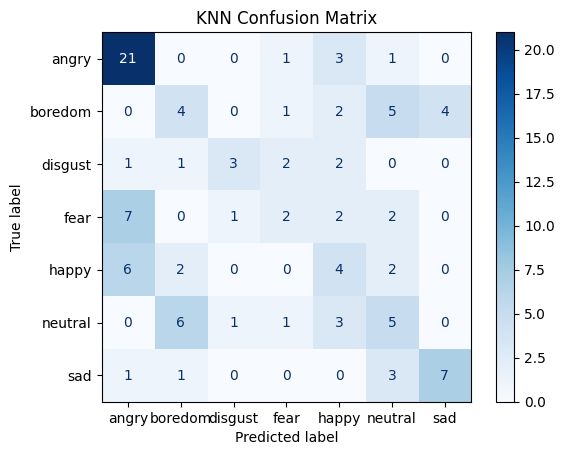

KNN Accuracy: 42.991%
              precision    recall  f1-score   support

       angry       0.58      0.81      0.68        26
     boredom       0.29      0.25      0.27        16
     disgust       0.60      0.33      0.43         9
        fear       0.29      0.14      0.19        14
       happy       0.25      0.29      0.27        14
     neutral       0.28      0.31      0.29        16
         sad       0.64      0.58      0.61        12

    accuracy                           0.43       107
   macro avg       0.42      0.39      0.39       107
weighted avg       0.42      0.43      0.41       107


Avg Accuracy = 47.850%



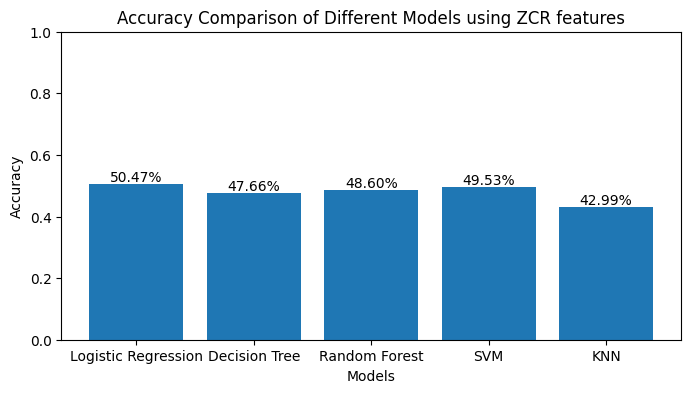

In [ ]:
acc_zcr = traintestmodel(xzcr,y,'ZCR')

Samples in Training set = 428
Samples in Testing set = 107


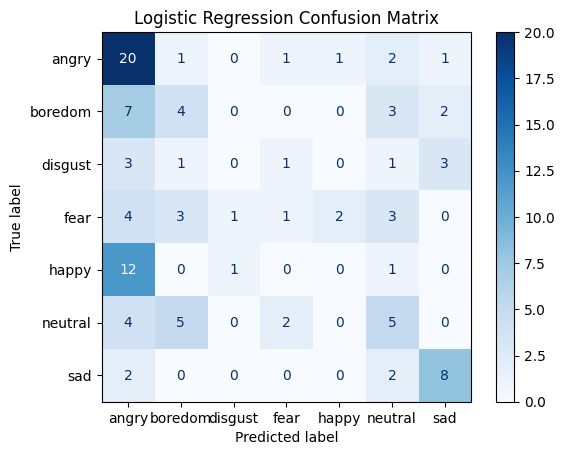

Logistic Regression Accuracy: 35.514%
              precision    recall  f1-score   support

       angry       0.38      0.77      0.51        26
     boredom       0.29      0.25      0.27        16
     disgust       0.00      0.00      0.00         9
        fear       0.20      0.07      0.11        14
       happy       0.00      0.00      0.00        14
     neutral       0.29      0.31      0.30        16
         sad       0.57      0.67      0.62        12

    accuracy                           0.36       107
   macro avg       0.25      0.30      0.26       107
weighted avg       0.27      0.36      0.29       107



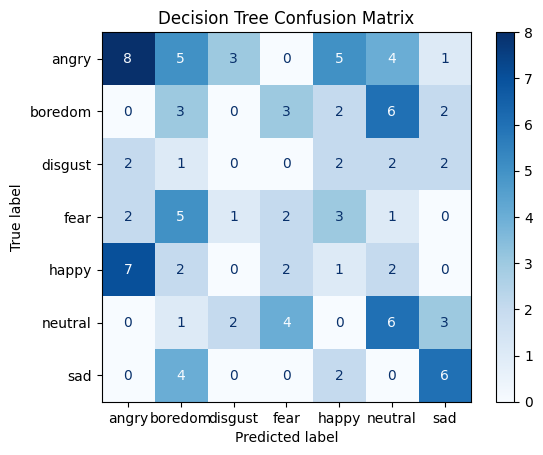

Decision Tree Accuracy: 24.299%
              precision    recall  f1-score   support

       angry       0.42      0.31      0.36        26
     boredom       0.14      0.19      0.16        16
     disgust       0.00      0.00      0.00         9
        fear       0.18      0.14      0.16        14
       happy       0.07      0.07      0.07        14
     neutral       0.29      0.38      0.32        16
         sad       0.43      0.50      0.46        12

    accuracy                           0.24       107
   macro avg       0.22      0.23      0.22       107
weighted avg       0.25      0.24      0.24       107



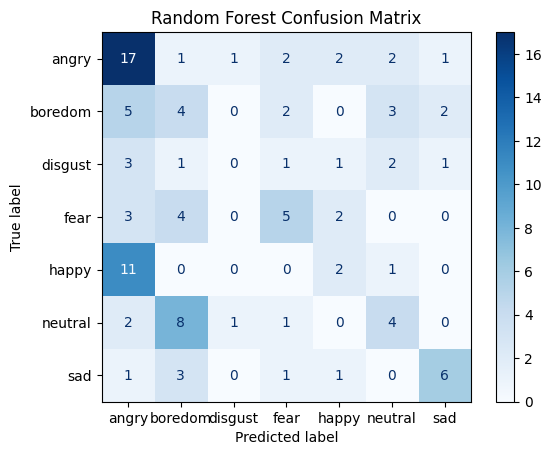

Random Forest Accuracy: 35.514%
              precision    recall  f1-score   support

       angry       0.40      0.65      0.50        26
     boredom       0.19      0.25      0.22        16
     disgust       0.00      0.00      0.00         9
        fear       0.42      0.36      0.38        14
       happy       0.25      0.14      0.18        14
     neutral       0.33      0.25      0.29        16
         sad       0.60      0.50      0.55        12

    accuracy                           0.36       107
   macro avg       0.31      0.31      0.30       107
weighted avg       0.33      0.36      0.33       107



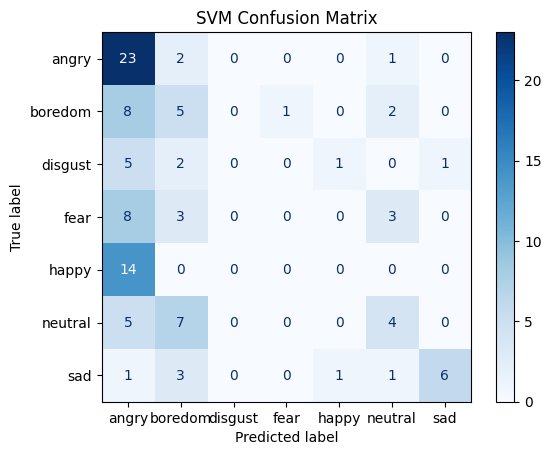

SVM Accuracy: 35.514%
              precision    recall  f1-score   support

       angry       0.36      0.88      0.51        26
     boredom       0.23      0.31      0.26        16
     disgust       0.00      0.00      0.00         9
        fear       0.00      0.00      0.00        14
       happy       0.00      0.00      0.00        14
     neutral       0.36      0.25      0.30        16
         sad       0.86      0.50      0.63        12

    accuracy                           0.36       107
   macro avg       0.26      0.28      0.24       107
weighted avg       0.27      0.36      0.28       107



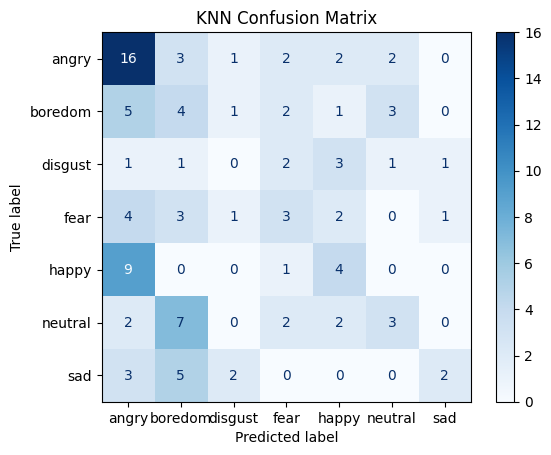

KNN Accuracy: 29.907%
              precision    recall  f1-score   support

       angry       0.40      0.62      0.48        26
     boredom       0.17      0.25      0.21        16
     disgust       0.00      0.00      0.00         9
        fear       0.25      0.21      0.23        14
       happy       0.29      0.29      0.29        14
     neutral       0.33      0.19      0.24        16
         sad       0.50      0.17      0.25        12

    accuracy                           0.30       107
   macro avg       0.28      0.25      0.24       107
weighted avg       0.30      0.30      0.28       107


Avg Accuracy = 32.150%



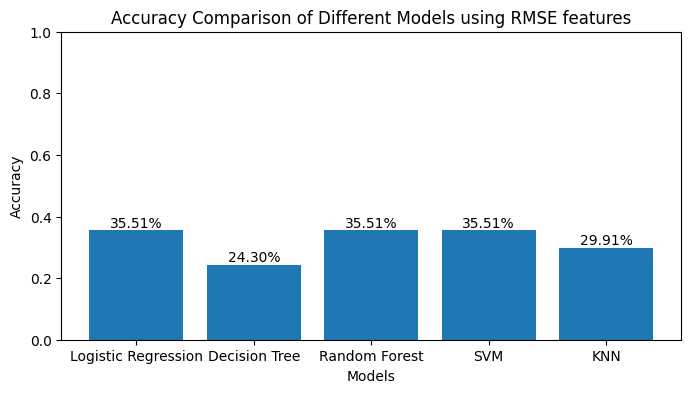

In [ ]:
acc_rmse = traintestmodel(xrmse,y,'RMSE')

Samples in Training set = 428
Samples in Testing set = 107


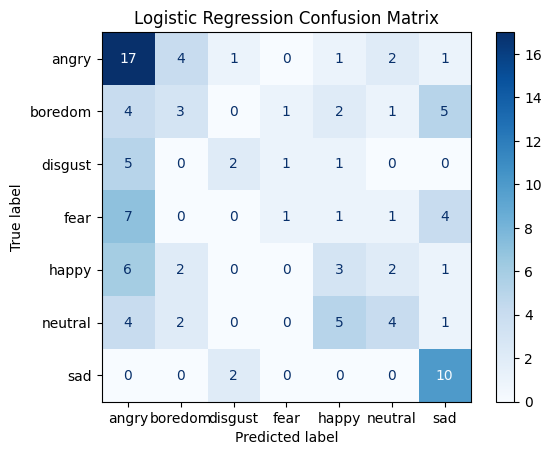

Logistic Regression Accuracy: 37.383%
              precision    recall  f1-score   support

       angry       0.40      0.65      0.49        26
     boredom       0.27      0.19      0.22        16
     disgust       0.40      0.22      0.29         9
        fear       0.33      0.07      0.12        14
       happy       0.23      0.21      0.22        14
     neutral       0.40      0.25      0.31        16
         sad       0.45      0.83      0.59        12

    accuracy                           0.37       107
   macro avg       0.36      0.35      0.32       107
weighted avg       0.36      0.37      0.33       107



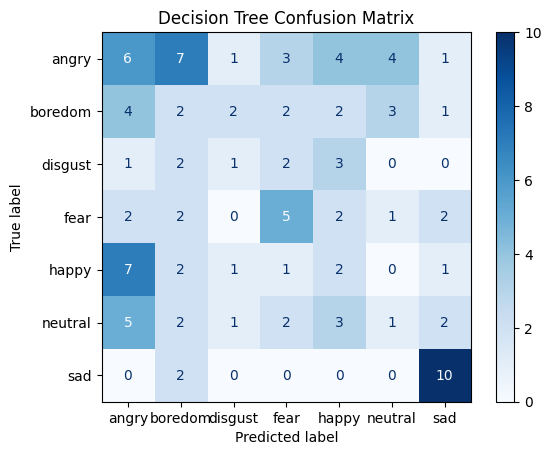

Decision Tree Accuracy: 25.234%
              precision    recall  f1-score   support

       angry       0.24      0.23      0.24        26
     boredom       0.11      0.12      0.11        16
     disgust       0.17      0.11      0.13         9
        fear       0.33      0.36      0.34        14
       happy       0.12      0.14      0.13        14
     neutral       0.11      0.06      0.08        16
         sad       0.59      0.83      0.69        12

    accuracy                           0.25       107
   macro avg       0.24      0.27      0.25       107
weighted avg       0.23      0.25      0.24       107



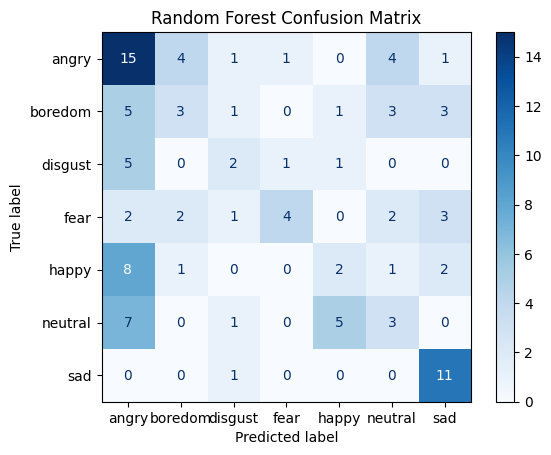

Random Forest Accuracy: 37.383%
              precision    recall  f1-score   support

       angry       0.36      0.58      0.44        26
     boredom       0.30      0.19      0.23        16
     disgust       0.29      0.22      0.25         9
        fear       0.67      0.29      0.40        14
       happy       0.22      0.14      0.17        14
     neutral       0.23      0.19      0.21        16
         sad       0.55      0.92      0.69        12

    accuracy                           0.37       107
   macro avg       0.37      0.36      0.34       107
weighted avg       0.37      0.37      0.35       107



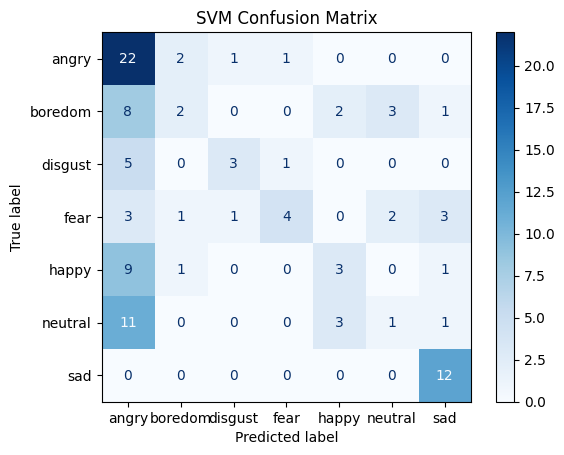

SVM Accuracy: 43.925%
              precision    recall  f1-score   support

       angry       0.38      0.85      0.52        26
     boredom       0.33      0.12      0.18        16
     disgust       0.60      0.33      0.43         9
        fear       0.67      0.29      0.40        14
       happy       0.38      0.21      0.27        14
     neutral       0.17      0.06      0.09        16
         sad       0.67      1.00      0.80        12

    accuracy                           0.44       107
   macro avg       0.46      0.41      0.39       107
weighted avg       0.43      0.44      0.38       107



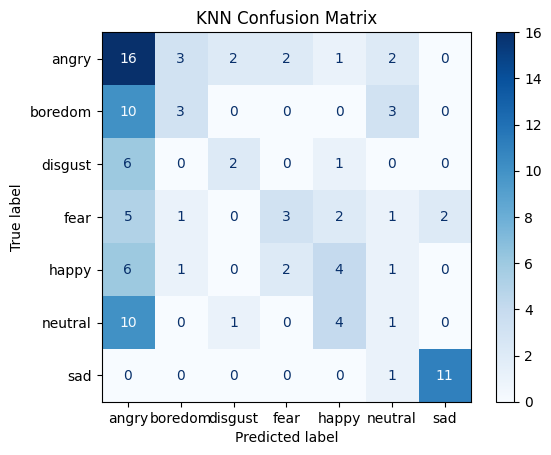

KNN Accuracy: 37.383%
              precision    recall  f1-score   support

       angry       0.30      0.62      0.41        26
     boredom       0.38      0.19      0.25        16
     disgust       0.40      0.22      0.29         9
        fear       0.43      0.21      0.29        14
       happy       0.33      0.29      0.31        14
     neutral       0.11      0.06      0.08        16
         sad       0.85      0.92      0.88        12

    accuracy                           0.37       107
   macro avg       0.40      0.36      0.36       107
weighted avg       0.37      0.37      0.35       107


Avg Accuracy = 36.262%



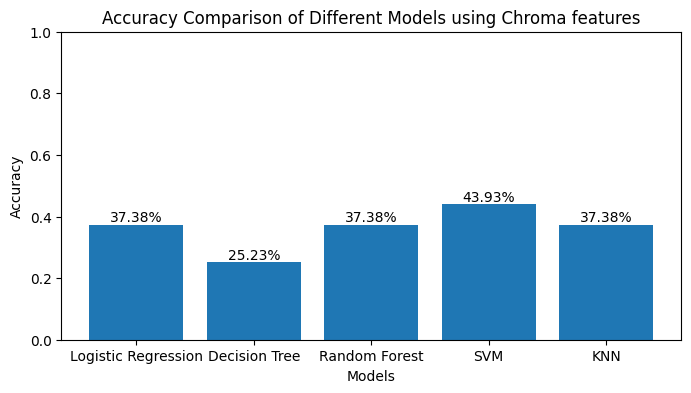

In [ ]:
acc_chr = traintestmodel(xchr,y,'Chroma')

Samples in Training set = 428
Samples in Testing set = 107


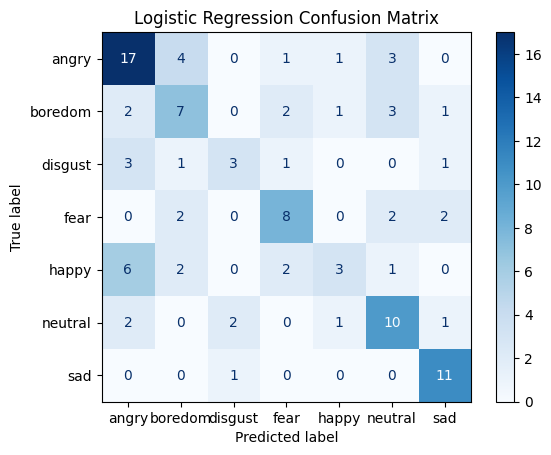

Logistic Regression Accuracy: 55.140%
              precision    recall  f1-score   support

       angry       0.57      0.65      0.61        26
     boredom       0.44      0.44      0.44        16
     disgust       0.50      0.33      0.40         9
        fear       0.57      0.57      0.57        14
       happy       0.50      0.21      0.30        14
     neutral       0.53      0.62      0.57        16
         sad       0.69      0.92      0.79        12

    accuracy                           0.55       107
   macro avg       0.54      0.54      0.52       107
weighted avg       0.54      0.55      0.53       107



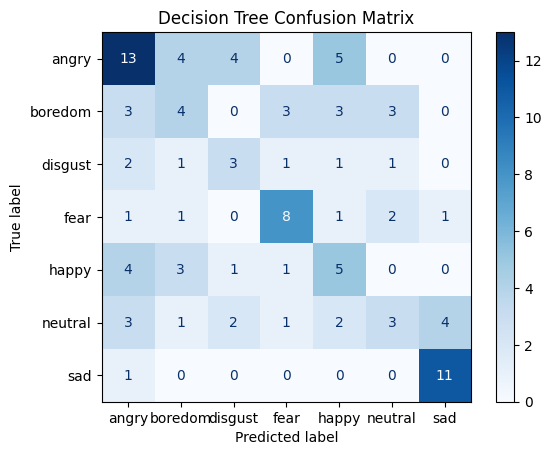

Decision Tree Accuracy: 43.925%
              precision    recall  f1-score   support

       angry       0.48      0.50      0.49        26
     boredom       0.29      0.25      0.27        16
     disgust       0.30      0.33      0.32         9
        fear       0.57      0.57      0.57        14
       happy       0.29      0.36      0.32        14
     neutral       0.33      0.19      0.24        16
         sad       0.69      0.92      0.79        12

    accuracy                           0.44       107
   macro avg       0.42      0.45      0.43       107
weighted avg       0.43      0.44      0.43       107



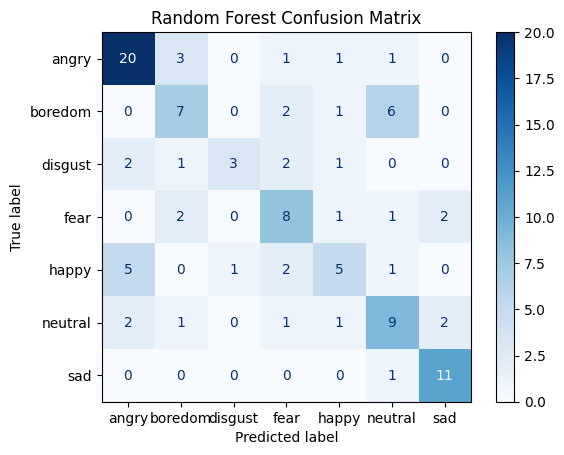

Random Forest Accuracy: 58.879%
              precision    recall  f1-score   support

       angry       0.69      0.77      0.73        26
     boredom       0.50      0.44      0.47        16
     disgust       0.75      0.33      0.46         9
        fear       0.50      0.57      0.53        14
       happy       0.50      0.36      0.42        14
     neutral       0.47      0.56      0.51        16
         sad       0.73      0.92      0.81        12

    accuracy                           0.59       107
   macro avg       0.59      0.56      0.56       107
weighted avg       0.59      0.59      0.58       107



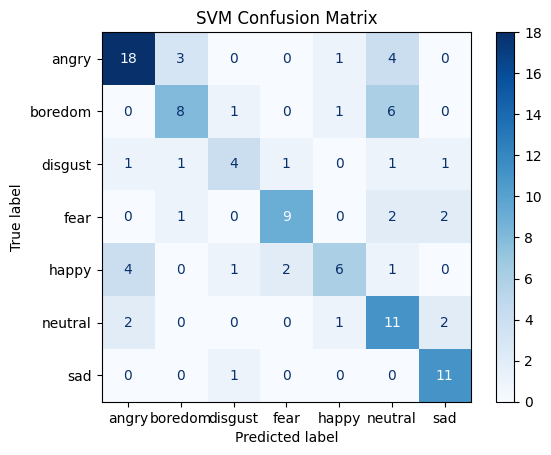

SVM Accuracy: 62.617%
              precision    recall  f1-score   support

       angry       0.72      0.69      0.71        26
     boredom       0.62      0.50      0.55        16
     disgust       0.57      0.44      0.50         9
        fear       0.75      0.64      0.69        14
       happy       0.67      0.43      0.52        14
     neutral       0.44      0.69      0.54        16
         sad       0.69      0.92      0.79        12

    accuracy                           0.63       107
   macro avg       0.64      0.62      0.61       107
weighted avg       0.64      0.63      0.62       107



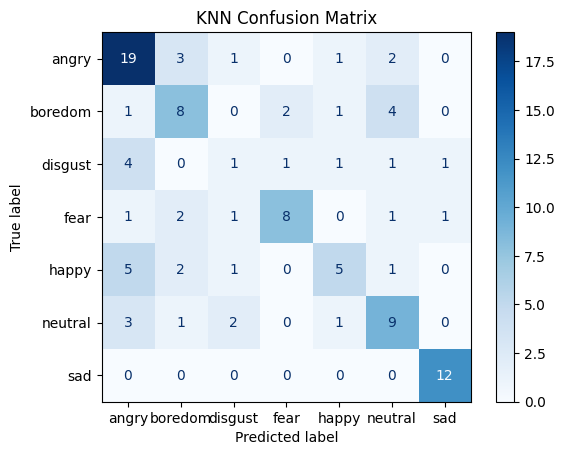

KNN Accuracy: 57.944%
              precision    recall  f1-score   support

       angry       0.58      0.73      0.64        26
     boredom       0.50      0.50      0.50        16
     disgust       0.17      0.11      0.13         9
        fear       0.73      0.57      0.64        14
       happy       0.56      0.36      0.43        14
     neutral       0.50      0.56      0.53        16
         sad       0.86      1.00      0.92        12

    accuracy                           0.58       107
   macro avg       0.55      0.55      0.54       107
weighted avg       0.57      0.58      0.57       107


Avg Accuracy = 55.701%



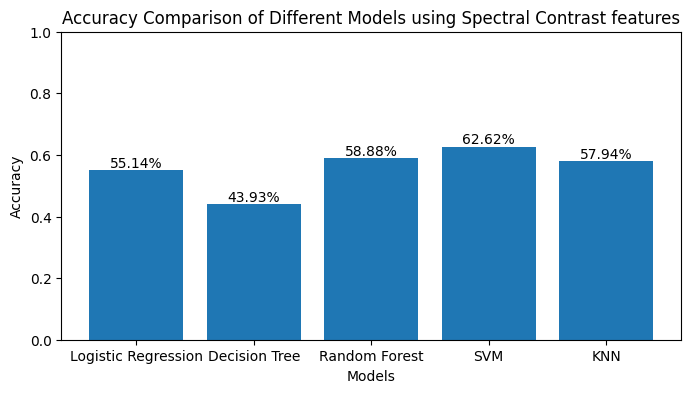

In [ ]:
acc_spc = traintestmodel(xspc,y,'Spectral Contrast')

Samples in Training set = 428
Samples in Testing set = 107


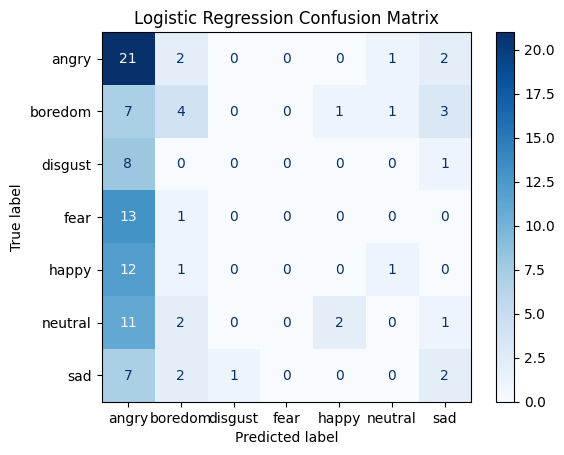

Logistic Regression Accuracy: 25.234%
              precision    recall  f1-score   support

       angry       0.27      0.81      0.40        26
     boredom       0.33      0.25      0.29        16
     disgust       0.00      0.00      0.00         9
        fear       0.00      0.00      0.00        14
       happy       0.00      0.00      0.00        14
     neutral       0.00      0.00      0.00        16
         sad       0.22      0.17      0.19        12

    accuracy                           0.25       107
   macro avg       0.12      0.17      0.13       107
weighted avg       0.14      0.25      0.16       107



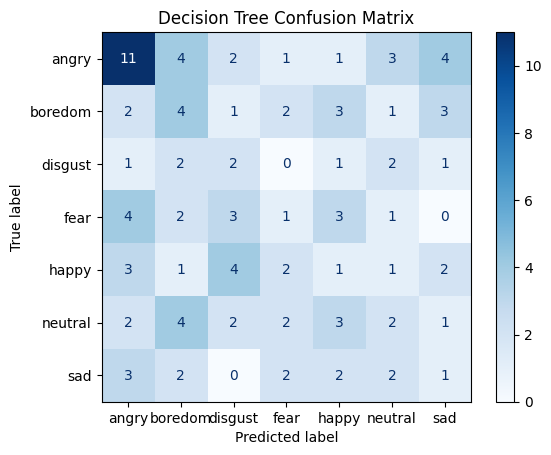

Decision Tree Accuracy: 20.561%
              precision    recall  f1-score   support

       angry       0.42      0.42      0.42        26
     boredom       0.21      0.25      0.23        16
     disgust       0.14      0.22      0.17         9
        fear       0.10      0.07      0.08        14
       happy       0.07      0.07      0.07        14
     neutral       0.17      0.12      0.14        16
         sad       0.08      0.08      0.08        12

    accuracy                           0.21       107
   macro avg       0.17      0.18      0.17       107
weighted avg       0.20      0.21      0.20       107



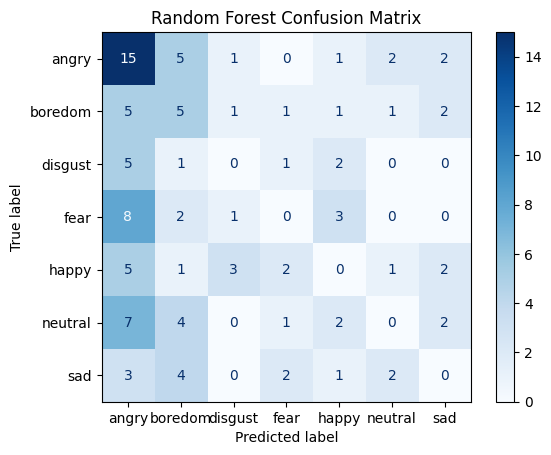

Random Forest Accuracy: 18.692%
              precision    recall  f1-score   support

       angry       0.31      0.58      0.41        26
     boredom       0.23      0.31      0.26        16
     disgust       0.00      0.00      0.00         9
        fear       0.00      0.00      0.00        14
       happy       0.00      0.00      0.00        14
     neutral       0.00      0.00      0.00        16
         sad       0.00      0.00      0.00        12

    accuracy                           0.19       107
   macro avg       0.08      0.13      0.10       107
weighted avg       0.11      0.19      0.14       107



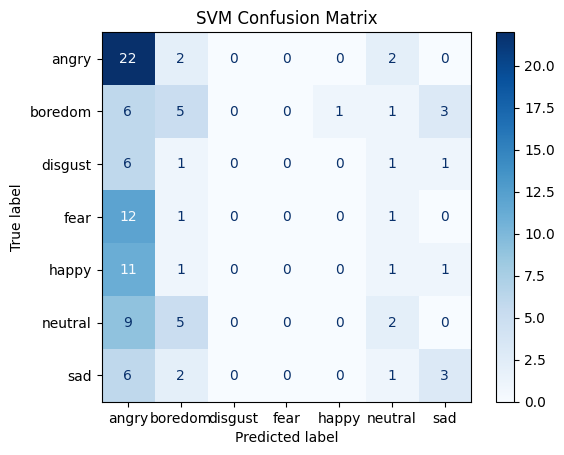

SVM Accuracy: 29.907%
              precision    recall  f1-score   support

       angry       0.31      0.85      0.45        26
     boredom       0.29      0.31      0.30        16
     disgust       0.00      0.00      0.00         9
        fear       0.00      0.00      0.00        14
       happy       0.00      0.00      0.00        14
     neutral       0.22      0.12      0.16        16
         sad       0.38      0.25      0.30        12

    accuracy                           0.30       107
   macro avg       0.17      0.22      0.17       107
weighted avg       0.19      0.30      0.21       107



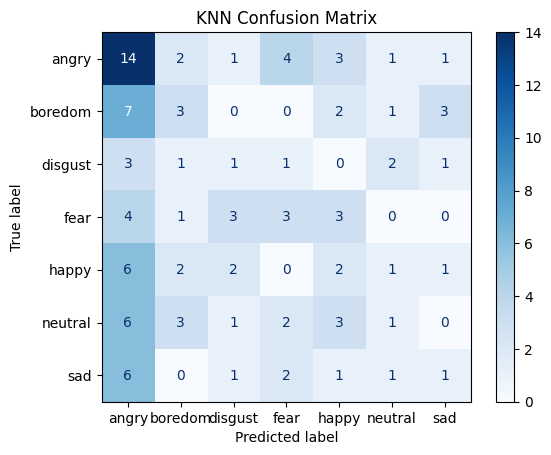

KNN Accuracy: 23.364%
              precision    recall  f1-score   support

       angry       0.30      0.54      0.39        26
     boredom       0.25      0.19      0.21        16
     disgust       0.11      0.11      0.11         9
        fear       0.25      0.21      0.23        14
       happy       0.14      0.14      0.14        14
     neutral       0.14      0.06      0.09        16
         sad       0.14      0.08      0.11        12

    accuracy                           0.23       107
   macro avg       0.19      0.19      0.18       107
weighted avg       0.21      0.23      0.21       107


Avg Accuracy = 23.551%



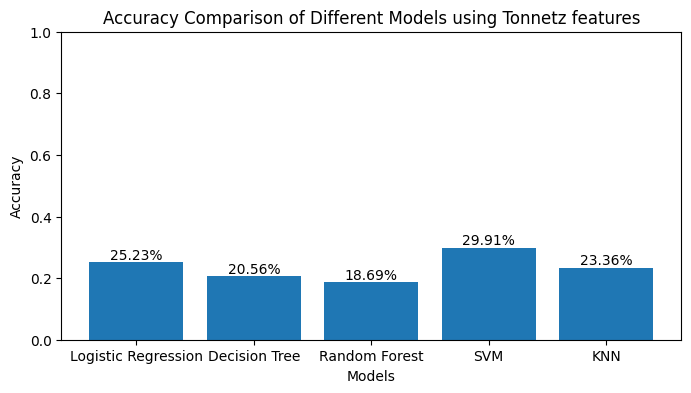

In [ ]:
acc_ton = traintestmodel(xton,y,'Tonnetz')

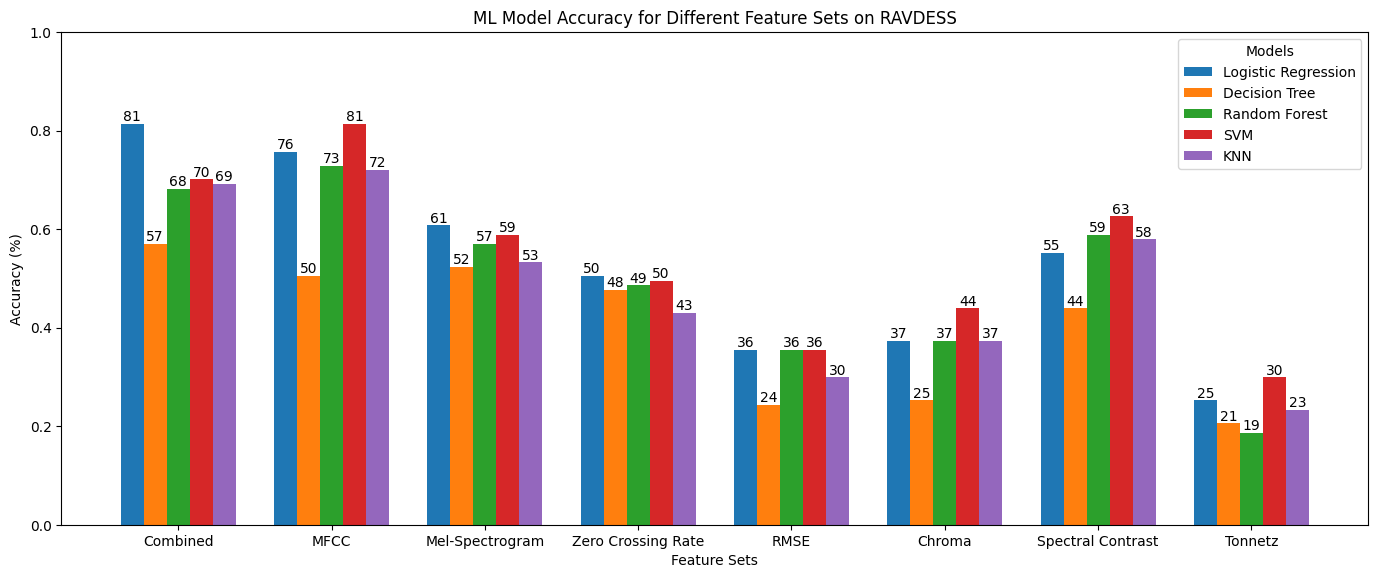

In [ ]:
feat_accs = [acc_comb, acc_mfcc, acc_mfs, acc_zcr, acc_rmse, acc_chr, acc_spc, acc_ton]
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN']
feat_names = ['Combined', 'MFCC', 'Mel-Spectrogram', 'Zero Crossing Rate', 'RMSE', 'Chroma', 'Spectral Contrast', 'Tonnetz']
num_features = len(feat_accs)
num_models = len(models)
x = np.arange(num_features)
bar_width = 0.15
fig, ax = plt.subplots(figsize=(14, 6))
for i in range(num_models):
    model_accs = [feat_accs[j][models[i]] for j in range(num_features)]
    bars = ax.bar(x + i * bar_width, model_accs, width=bar_width, label=models[i])
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height * 100:.0f}', ha='center', va='bottom')
ax.set_xlabel('Feature Sets')
ax.set_ylabel('Accuracy (%)')
ax.set_title('ML Model Accuracy for Different Feature Sets on EMO-DB Dataset')
ax.set_xticks(x + bar_width * (num_models - 1) / 2)
ax.set_xticklabels(feat_names)
ax.set_ylim(0, 1)
ax.legend(title='Models', bbox_to_anchor=(1, 1))
plt.tight_layout(pad=1.5)
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization,Input
from tensorflow.keras.optimizers import Adam,SGD,RMSprop,Adadelta,Adagrad,Adamax,Nadam
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from imblearn.over_sampling import SMOTE

In [ ]:
df

mfs1      mfs2      mfs3       mfs4       mfs5       mfs6  \
0    0.213872  0.102090  0.090887   1.257758   2.270701   6.406219   
1    0.357942  0.185719  2.257908  15.372119  16.542055  31.762120   
2    0.020697  0.017038  0.014131   0.030520   0.063819   1.506716   
3    0.087606  0.050022  0.034882   0.019206   0.023292   0.856702   
4    0.556998  0.133099  2.486111  22.960217  46.629635  76.015780   
..        ...       ...       ...        ...        ...        ...   
530  0.171170  0.216475  0.147940   0.074751   0.086122   0.283577   
531  0.915826  0.642641  0.720327   0.487552   0.239672   0.393406   
532  0.603223  0.275524  0.220934   0.151671   0.190458  28.352022   
533  0.000619  0.000508  0.000536   0.000676   0.000991   0.000883   
534  0.005166  0.004690  0.006192   0.004188   0.003247   0.006824   

           mfs7        mfs8        mfs9       mfs10  ...  spectral_contrast5  \
0     11.820951   10.039133    8.405095   10.122995  ...           17.813053   
1     26.760712    5.890410   12.160147    7.236262  ...           17.984726   
2      3.039754    5.498095    8.211032   15.111133  ...           18.005453   
3      4.686006   11.320702   15.652591   13.851864  ...           18.263096   
4      5.946709    8.649186    4.704916   16.429610  ...           16.427454   
..          ...         ...         ...         ...  ...                 ...   
530    3.280870   15.577481   44.061363   53.666157  ...           18.207671   
531    9.041094  359.267820  465.566600  137.835330  ...           16.904528   
532  207.304080  185.598250   16.520780    0.495565  ...           15.880638   
533    0.007695    0.028077    0.131992    0.315783  ...           19.190806   
534    0.016406    0.084455    0.206275    0.674456  ...           19.348132   

     spectral_contrast6  spectral_contrast7  tonnetz1  tonnetz2  tonnetz3  \
0             16.997558           19.144154  0.001157  0.019221 -0.060937   
1             19.843641           18.454177 -0.011623  0.014094 -0.045006   
2             20.025895           17.455325 -0.009271  0.010508 -0.032510   
3             17.755779           18.319159  0.000570 -0.044210 -0.034926   
4             19.904993           17.233801 -0.004110 -0.080962 -0.068439   
..                  ...                 ...       ...       ...       ...   
530           19.464156           17.045317 -0.029963  0.006660 -0.020731   
531           19.493690           16.110924  0.026357  0.050051  0.104919   
532           18.133370           16.335688  0.060161  0.015662 -0.004029   
533           20.788739           17.529055  0.009313 -0.006189 -0.024897   
534           21.324245           17.704772 -0.004126  0.006379  0.043416   

     tonnetz4  tonnetz5  tonnetz6    label  
0    0.011255 -0.005811 -0.005814    happy  
1    0.112638 -0.034898 -0.006937  neutral  
2   -0.095437  0.012397  0.000373    angry  
3   -0.028225  0.022242  0.007522    happy  
4   -0.030369  0.020112  0.010972  neutral  
..        ...       ...       ...      ...  
530 -0.014048 -0.003789 -0.003878  disgust  
531  0.014105  0.031064 -0.016949      sad  
532  0.004883  0.000973 -0.023721      sad  
533 -0.014199 -0.009167  0.018344    angry  
534 -0.070196 -0.001585 -0.005230    angry  

[535 rows x 194 columns]

In [ ]:
def split_preprocess(df,apply_smote=False,rs=536,returnscalerle=False):
  x = df.drop(['label'], axis=1)
  y = df['label']
  trainX, testX, trainY, testY = train_test_split(x, y, test_size=0.2, random_state=rs,stratify=y)
  scaler = StandardScaler()
  trainX = scaler.fit_transform(trainX)
  testX = scaler.transform(testX)
  if apply_smote:
    smote = SMOTE(random_state=42)
    trainX, trainY = smote.fit_resample(trainX, trainY)
  le = LabelEncoder()
  trainY_enc = to_categorical(le.fit_transform(trainY))
  testY_enc = to_categorical(le.transform(testY))
  if returnscalerle:
    return trainX, testX, trainY, testY, trainY_enc,testY_enc, scaler,le
  return trainX, testX, trainY, testY,trainY_enc,testY_enc

In [ ]:
trainX, testX, trainY, testY, trainY_enc, testY_enc,scaler,le = split_preprocess(df,rs=710,returnscalerle=True)
model = Sequential()
model.add(Input((trainX.shape[1],)))
model.add(Dense(20, activation='relu',kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(40, activation='relu',kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(80, activation='relu',kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(len(np.unique(trainY)), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 20)                  │           3,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 20)                  │              80 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 40)                  │             840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 40)                  │             160 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 40)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 80)                  │           3,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 80)                  │             320 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │             567 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,127 (35.65 KB)

 Trainable params: 8,847 (34.56 KB)

 Non-trainable params: 280 (1.09 KB)

In [ ]:
import shutil
mpath = '/content/drive/MyDrive/PBL_2_Files/Models/ann_model_emodb_mfcc.keras'
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=25, restore_best_weights=True),
             tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=15, min_lr=0.00001),
             tf.keras.callbacks.ModelCheckpoint(filepath=mpath, monitor='val_accuracy', save_best_only=True,verbose=1)]
history = model.fit(trainX, trainY_enc, epochs=500, batch_size=32, validation_data=(testX, testY_enc),callbacks=callbacks)
_, accuracy = model.evaluate(testX, testY_enc)
print('\nAccuracy: %.2f' % (accuracy*100))
predictions = model.predict(testX)
predicted_labels = le.inverse_transform(np.argmax(predictions, axis=1))
print(classification_report(testY, predicted_labels))
new_mpath = f"/content/drive/MyDrive/PBL_2_Files/Models/ann_model_emodb_mfcc_val_acc_{accuracy*100:.2f}.keras"
shutil.move(mpath, new_mpath)

Epoch 1/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - accuracy: 0.1232 - loss: 3.9756
Epoch 1: val_accuracy improved from -inf to 0.15888, saving model to /content/drive/MyDrive/PBL_2_Files/Models/ann_model_emodb_mfcc.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 438ms/step - accuracy: 0.1247 - loss: 3.9647 - val_accuracy: 0.1589 - val_loss: 3.1037 - learning_rate: 0.0010
Epoch 2/500
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1863 - loss: 3.4908 
Epoch 2: val_accuracy improved from 0.15888 to 0.27103, saving model to /content/drive/MyDrive/PBL_2_Files/Models/ann_model_emodb_mfcc.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1901 - loss: 3.4760 - val_accuracy: 0.2710 - val_loss: 2.9807 - learning_rate: 0.0010
Epoch 3/500
 1/14 ━━━━━━━━━━━━━━━━━━━━ 3s 256ms/step - accuracy: 0.2812 - loss: 2.8899
Epoch 3: val_accuracy improved from 0.27103 to 0.38318, saving model to /content/drive/MyDrive/PBL_2_Files/Models/ann_model_emodb_mfcc.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

'/content/drive/MyDrive/PBL_2_Files/Models/ann_model_emodb_mfcc_val_acc_77.57.keras'

In [ ]:
from tensorflow.keras.regularizers import l1,l2,l1_l2

def getRandomHPPMS():
    params = {}
    params['rs_split'] = np.random.randint(0,1000)
    #params['rs_split'] = 6
    params['num_HL'] = np.random.randint(2,4+1)
    for i in range(1,params['num_HL']+1):
        params[f'units_{i}'] = np.random.choice(range(64,512+2,2))
        params[f'KR_{i}'] = np.random.choice(['l1','l2','l1l2','none'])
        params[f'BN_{i}'] = np.random.choice([True,False])
        #params[f'dropout_rate_{i}'] = np.random.choice(np.round(np.arange(0,0.5+0.1,0.1),1))
        params[f'dropout_rate_{i}'] = np.round(np.random.uniform(0,0.5),4)
    params['learning_rate'] = np.random.uniform(0.0001,0.005)
    optims = ['Adam','SGD','RMSprop','Adadelta','Adagrad','Adamax','Nadam']
    params['optimizer'] = np.random.choice(optims)
    params['batch_size'] = np.random.choice(range(32,132,4))
    params['adpLR'] = np.random.choice([True,False])
    params['apply_smote'] = np.random.choice([True,False])
    return params

def buildntrainmodel(params,feats,max_epochs=500):
    trainX, testX, trainY, testY, trainY_enc, testY_enc,scaler,le = split_preprocess(feats,rs=params['rs_split'],apply_smote=params['apply_smote'],returnscalerle=True)
    model = Sequential()
    model.add(Input((trainX.shape[1],)))
    for i in range(1,params['num_HL']+1):
        kern = {'l1':l1(),'l2':l2(),'l1l2':l1_l2(),'none':None}
        model.add(Dense(units=params[f'units_{i}'],activation='relu',kernel_regularizer=kern[params[f'KR_{i}']]))
        if params[f'BN_{i}']:
            model.add(BatchNormalization())
        if params[f'dropout_rate_{i}']>0:
            model.add(Dropout(params[f'dropout_rate_{i}']))
    model.add(Dense(len(np.unique(trainY)), activation='softmax'))
    optimizer_dict = {'Adam': Adam(learning_rate=params['learning_rate']),
                      'SGD': SGD(learning_rate=params['learning_rate']),
                      'RMSprop': RMSprop(learning_rate=params['learning_rate']),
                      'Adadelta': Adadelta(learning_rate=params['learning_rate']),
                      'Adagrad': Adagrad(learning_rate=params['learning_rate']),
                      'Adamax': Adamax(learning_rate=params['learning_rate']),
                      'Nadam': Nadam(learning_rate=params['learning_rate'])}

    model.compile(optimizer=optimizer_dict[params['optimizer']], loss='categorical_crossentropy', metrics=['accuracy'])
    callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=25, restore_best_weights=True)]
    if params['adpLR']:
        callbacks.append(tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=15, min_lr=0.00001))
    histann = model.fit(trainX, trainY_enc, epochs=max_epochs, batch_size=params['batch_size'],validation_data=(testX, testY_enc),callbacks=callbacks)
    _, accuracy = model.evaluate(testX, testY_enc)
    splits = (trainX, testX, trainY, testY, trainY_enc, testY_enc,scaler,le)
    return accuracy,params,model,splits,histann

In [ ]:
import IPython.display as ipd
import time
def plot_history(hist,acc,id):
  plt.figure(figsize=(12, 6))
  plt.suptitle(f'Training & Validation Curves for Best ANN Model - Val_Acc={acc*100:.2f}% at Trial #{id}', fontsize=16)
  plt.subplot(1, 2, 1)
  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper right')

  plt.subplot(1, 2, 2)
  plt.plot(hist.history['accuracy'])
  plt.plot(hist.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='lower right')
  plt.tight_layout()
  plt.show()

def tune_hyperparams(ntrials,feats,max_epochs=500):
    max_acc = 0
    totm = 0
    phist = dict()
    histories = dict()
    for i in range(1,ntrials+1):
        st = time.time()
        print(f"\nRunning Trial #{i}\n")
        params = getRandomHPPMS()
        if i==1:
            best_params = params
        print(f"{'Current Value':<15}{'|Best Value So Far':<21}{'|Hyperparameter'}")
        print(f"{'-' * 15}|{'-' * 20}|{'-' * 15}")
        for param, value in params.items():
            best_value = best_params.get(param, 'N/A')
            if param=='learning_rate':
                best_value,value = round(best_value,3),round(value,3)
            print(f"{str(value):<15}|{str(best_value):<20}|{param}")
        print()
        acc,params,model,splits,histann = buildntrainmodel(params,feats,max_epochs=max_epochs)
        trainX, testX, trainY, testY, trainY_enc, testY_enc,scaler,le = splits
        fparams = frozenset(params.items())
        phist[fparams] = acc
        histories[i] = histann
        if acc>max_acc:
            max_acc = acc
            best_params = params
            best_trial = i
            best_model = model
        ipd.clear_output(wait=True)
        en = time.time()
        tm = en-st
        totm+=tm
        ep = len(histann.history['accuracy'])
        tracc = max(histann.history['accuracy'])
        print(f"Trial {i} Complete [{int(tm/3600)}h {int(tm/60)}m {int(tm%60)}s] - Trained for {ep} epochs")
        print(f"train_accuracy = {tracc*100:.3f}%")
        print(f"val_accuracy = {acc*100:.3f}%")
        print(f"Overfitting Difference = {(tracc-acc)*100:.3f}%\n")
        print(f"Best val_accuracy So Far: {max_acc*100:.3f}% at Trial #{best_trial}")
        print(f"Total time elapsed: [{int(totm/3600)}h {int(totm/60)}m {int(totm%60)}s]")
    print(f"Best Hyperparameters: {best_params}")
    print("Best Model Summary:")
    print(best_model.summary())
    best_hist = histories[best_trial]
    plot_history(best_hist,max_acc,best_trial)
    trainX, testX, trainY, testY, trainY_enc, testY_enc,scaler,le = split_preprocess(feats,rs=best_params['rs_split'],apply_smote=best_params['apply_smote'],returnscalerle=True)
    predictions = best_model.predict(testX)
    predicted_labels = le.inverse_transform(np.argmax(predictions, axis=1))
    cm = confusion_matrix(testY, predicted_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=le.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix for Best ANN Model")
    plt.show()
    print(f"\nAccuracy = {accuracy_score(testY,predicted_labels)*100:.3f}%\n")
    print(classification_report(testY, predicted_labels))
    best_model.save(f"/content/drive/MyDrive/PBL_2_Files/Models/ann_model_emodb_mfcc_val_acc_{max_acc*100:.2f}.keras")
    return max_acc, best_params, best_trial, best_model, phist,histories

Trial 20 Complete [0h 0m 20s] - Trained for 37 epochs
train_accuracy = 93.692%
val_accuracy = 71.963%
Overfitting Difference = 21.729%

Best val_accuracy So Far: 85.981% at Trial #5
Total time elapsed: [0h 6m 58s]
Best Hyperparameters: {'rs_split': 254, 'num_HL': 2, 'units_1': 290, 'KR_1': 'l2', 'BN_1': True, 'dropout_rate_1': 0.1757, 'units_2': 308, 'KR_2': 'l2', 'BN_2': False, 'dropout_rate_2': 0.264, 'learning_rate': 0.0007841645693711812, 'optimizer': 'Nadam', 'batch_size': 92, 'adpLR': False, 'apply_smote': True}
Best Model Summary:


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_94 (Dense)                     │ (None, 290)                 │          56,260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_37               │ (None, 290)                 │           1,160 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_69 (Dropout)                 │ (None, 290)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_95 (Dense)                     │ (None, 308)                 │          89,628 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_70 (Dropout)                 │ (None, 308)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_96 (Dense)                     │ (None, 7)                   │           2,163 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 446,476 (1.70 MB)

 Trainable params: 148,631 (580.59 KB)

 Non-trainable params: 580 (2.27 KB)

 Optimizer params: 297,265 (1.13 MB)

None


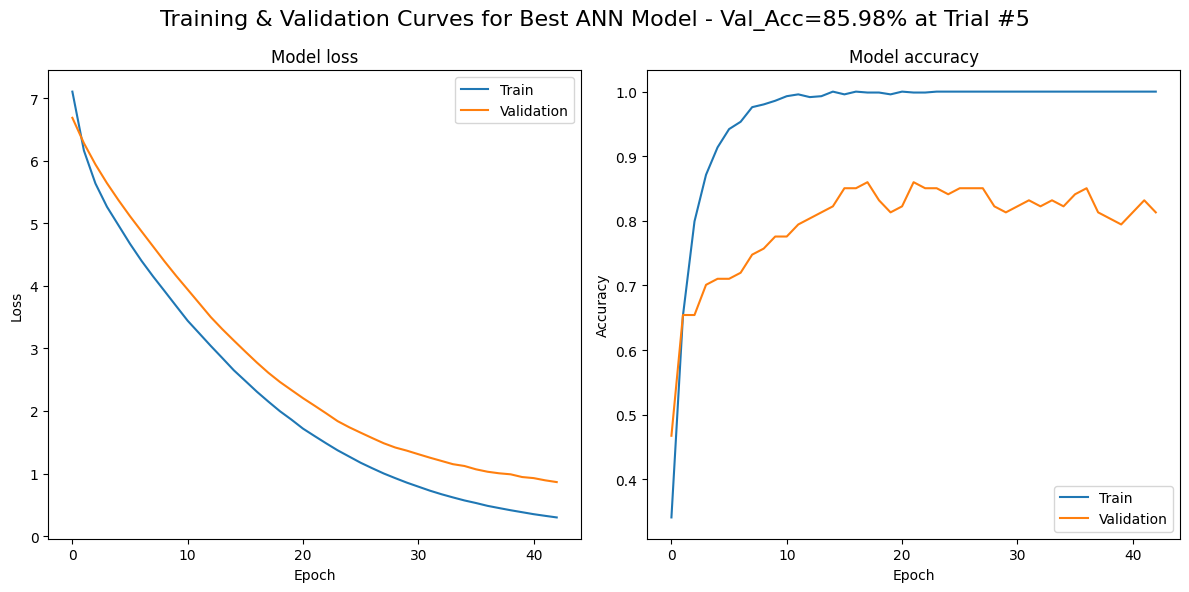

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


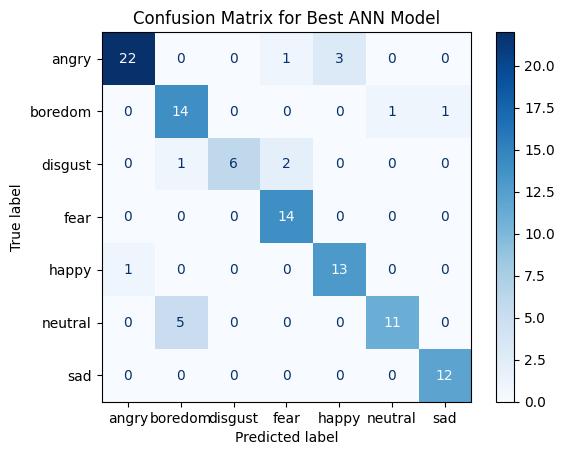


Accuracy = 85.981%

              precision    recall  f1-score   support

       angry       0.96      0.85      0.90        26
     boredom       0.70      0.88      0.78        16
     disgust       1.00      0.67      0.80         9
        fear       0.82      1.00      0.90        14
       happy       0.81      0.93      0.87        14
     neutral       0.92      0.69      0.79        16
         sad       0.92      1.00      0.96        12

    accuracy                           0.86       107
   macro avg       0.88      0.86      0.86       107
weighted avg       0.88      0.86      0.86       107



In [ ]:
max_acc, best_params, best_trial, best_model, phist, histories = tune_hyperparams(ntrials=20,feats=df,max_epochs=500)

Trial 20 Complete [0h 0m 19s] - Trained for 61 epochs
train_accuracy = 99.766%
val_accuracy = 80.374%
Overfitting Difference = 19.393%

Best val_accuracy So Far: 86.916% at Trial #3
Total time elapsed: [0h 6m 37s]
Best Hyperparameters: {'rs_split': 76, 'num_HL': 3, 'units_1': 288, 'KR_1': 'none', 'BN_1': False, 'dropout_rate_1': 0.0432, 'units_2': 258, 'KR_2': 'l1l2', 'BN_2': True, 'dropout_rate_2': 0.183, 'units_3': 370, 'KR_3': 'l1l2', 'BN_3': True, 'dropout_rate_3': 0.0189, 'learning_rate': 0.0007389747211412324, 'optimizer': 'RMSprop', 'batch_size': 60, 'adpLR': False, 'apply_smote': True}
Best Model Summary:


Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_177 (Dense)                    │ (None, 288)                 │          55,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_132 (Dropout)                │ (None, 288)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_178 (Dense)                    │ (None, 258)                 │          74,562 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_68               │ (None, 258)                 │           1,032 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_133 (Dropout)                │ (None, 258)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_179 (Dense)                    │ (None, 370)                 │          95,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_69               │ (None, 370)                 │           1,480 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_134 (Dropout)                │ (None, 370)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_180 (Dense)                    │ (None, 7)                   │           2,597 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 461,492 (1.76 MB)

 Trainable params: 230,117 (898.89 KB)

 Non-trainable params: 1,256 (4.91 KB)

 Optimizer params: 230,119 (898.91 KB)

None


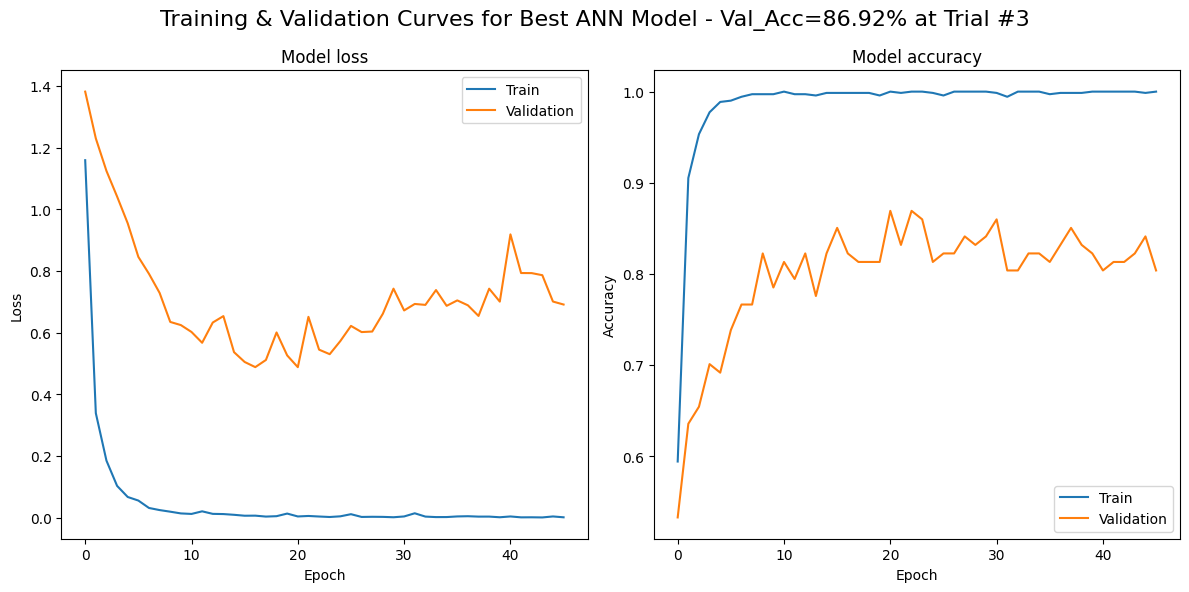

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step


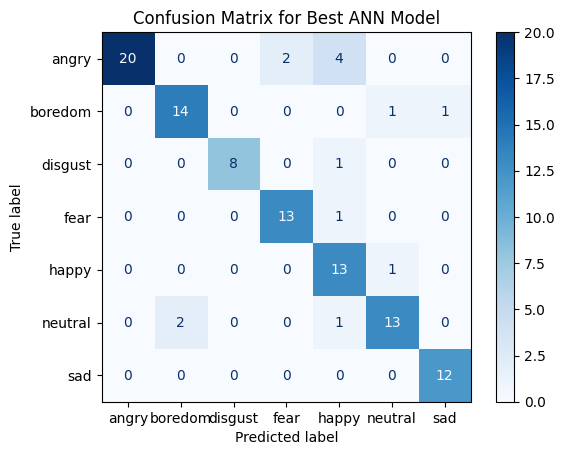


Accuracy = 86.916%

              precision    recall  f1-score   support

       angry       1.00      0.77      0.87        26
     boredom       0.88      0.88      0.88        16
     disgust       1.00      0.89      0.94         9
        fear       0.87      0.93      0.90        14
       happy       0.65      0.93      0.76        14
     neutral       0.87      0.81      0.84        16
         sad       0.92      1.00      0.96        12

    accuracy                           0.87       107
   macro avg       0.88      0.89      0.88       107
weighted avg       0.89      0.87      0.87       107



In [ ]:
max_acc, best_params, best_trial, best_model, phist, histories = tune_hyperparams(ntrials=20,feats=df,max_epochs=500)

Trial 20 Complete [0h 0m 24s] - Trained for 108 epochs
train_accuracy = 88.551%
val_accuracy = 78.505%
Overfitting Difference = 10.047%

Best val_accuracy So Far: 87.850% at Trial #17
Total time elapsed: [0h 6m 58s]
Best Hyperparameters: {'rs_split': 76, 'num_HL': 2, 'units_1': 86, 'KR_1': 'l1', 'BN_1': True, 'dropout_rate_1': 0.1643, 'units_2': 286, 'KR_2': 'none', 'BN_2': True, 'dropout_rate_2': 0.4329, 'learning_rate': 0.0034956938578589738, 'optimizer': 'Adam', 'batch_size': 108, 'adpLR': True, 'apply_smote': False}
Best Model Summary:


Model: "sequential_99"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_393 (Dense)                    │ (None, 86)                  │          16,684 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_147              │ (None, 86)                  │             344 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_294 (Dropout)                │ (None, 86)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_394 (Dense)                    │ (None, 286)                 │          24,882 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_148              │ (None, 286)                 │           1,144 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_295 (Dropout)                │ (None, 286)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_395 (Dense)                    │ (None, 7)                   │           2,009 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 133,703 (522.28 KB)

 Trainable params: 44,319 (173.12 KB)

 Non-trainable params: 744 (2.91 KB)

 Optimizer params: 88,640 (346.25 KB)

None


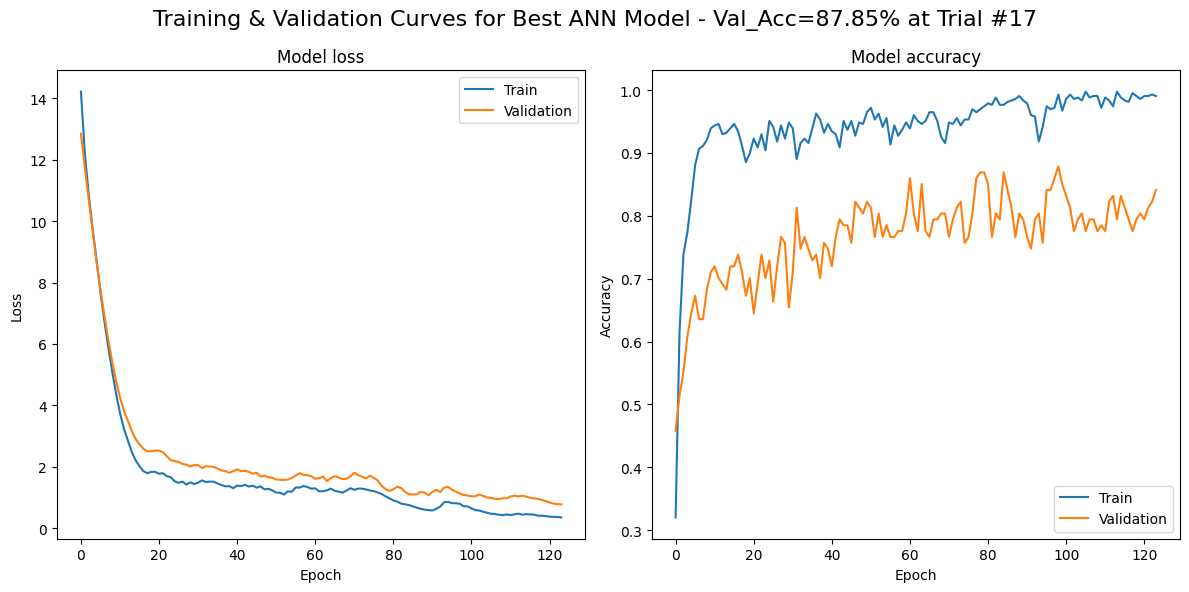

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


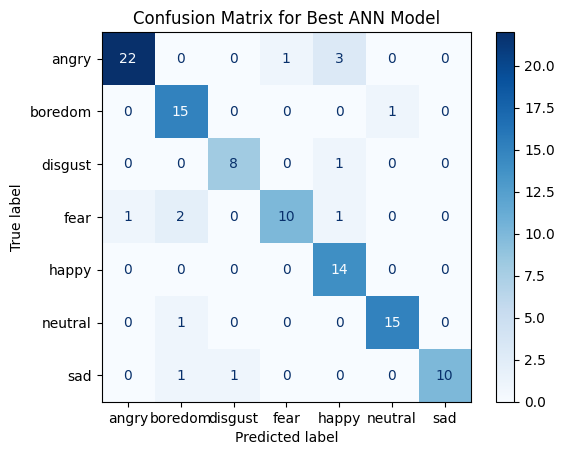


Accuracy = 87.850%

              precision    recall  f1-score   support

       angry       0.96      0.85      0.90        26
     boredom       0.79      0.94      0.86        16
     disgust       0.89      0.89      0.89         9
        fear       0.91      0.71      0.80        14
       happy       0.74      1.00      0.85        14
     neutral       0.94      0.94      0.94        16
         sad       1.00      0.83      0.91        12

    accuracy                           0.88       107
   macro avg       0.89      0.88      0.88       107
weighted avg       0.89      0.88      0.88       107



In [ ]:
def getRandomHPPMS():
    params = {}
    #params['rs_split'] = np.random.randint(0,1000)
    params['rs_split'] = 76
    params['num_HL'] = np.random.randint(2,4+1)
    for i in range(1,params['num_HL']+1):
        params[f'units_{i}'] = np.random.choice(range(64,512+2,2))
        params[f'KR_{i}'] = np.random.choice(['l1','l2','l1l2','none'])
        params[f'BN_{i}'] = np.random.choice([True,False])
        #params[f'dropout_rate_{i}'] = np.random.choice(np.round(np.arange(0,0.5+0.1,0.1),1))
        params[f'dropout_rate_{i}'] = np.round(np.random.uniform(0,0.5),4)
    params['learning_rate'] = np.random.uniform(0.0001,0.005)
    optims = ['Adam','SGD','RMSprop','Adadelta','Adagrad','Adamax','Nadam']
    params['optimizer'] = np.random.choice(optims)
    params['batch_size'] = np.random.choice(range(32,132,4))
    params['adpLR'] = np.random.choice([True,False])
    params['apply_smote'] = np.random.choice([True,False])
    return params
max_acc, best_params, best_trial, best_model, phist, histories = tune_hyperparams(ntrials=20,feats=df,max_epochs=500)

Trial 30 Complete [0h 0m 12s] - Trained for 30 epochs
train_accuracy = 95.794%
val_accuracy = 72.897%
Overfitting Difference = 22.897%

Best val_accuracy So Far: 87.850% at Trial #23
Total time elapsed: [0h 13m 53s]
Best Hyperparameters: {'rs_split': 76, 'num_HL': 2, 'units_1': 434, 'KR_1': 'l1l2', 'BN_1': True, 'dropout_rate_1': 0.1788, 'units_2': 124, 'KR_2': 'l1l2', 'BN_2': True, 'dropout_rate_2': 0.4552, 'learning_rate': 0.0038740065147155633, 'optimizer': 'RMSprop', 'batch_size': 68, 'adpLR': True, 'apply_smote': True}
Best Model Summary:


Model: "sequential_125"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_498 (Dense)                    │ (None, 434)                 │          84,196 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_190              │ (None, 434)                 │           1,736 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_373 (Dropout)                │ (None, 434)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_499 (Dense)                    │ (None, 124)                 │          53,940 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_191              │ (None, 124)                 │             496 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_374 (Dropout)                │ (None, 124)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_500 (Dense)                    │ (None, 7)                   │             875 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281,372 (1.07 MB)

 Trainable params: 140,127 (547.37 KB)

 Non-trainable params: 1,116 (4.36 KB)

 Optimizer params: 140,129 (547.38 KB)

None


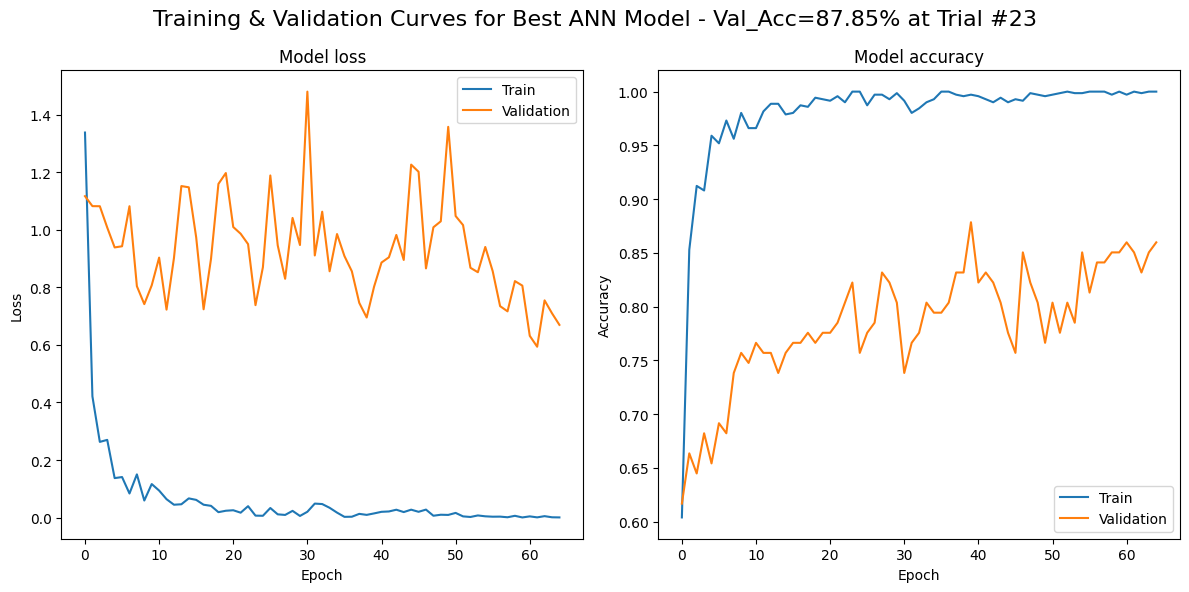

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step


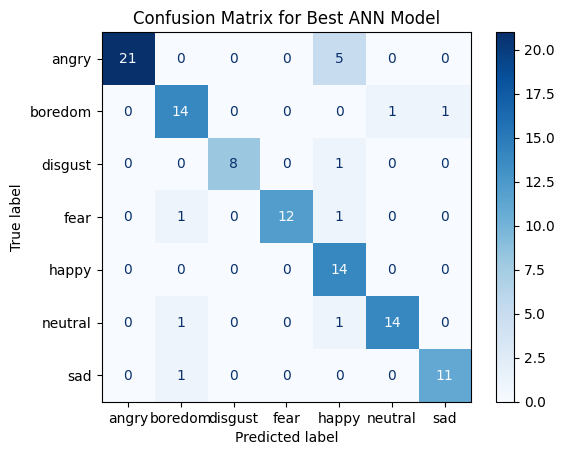


Accuracy = 87.850%

              precision    recall  f1-score   support

       angry       1.00      0.81      0.89        26
     boredom       0.82      0.88      0.85        16
     disgust       1.00      0.89      0.94         9
        fear       1.00      0.86      0.92        14
       happy       0.64      1.00      0.78        14
     neutral       0.93      0.88      0.90        16
         sad       0.92      0.92      0.92        12

    accuracy                           0.88       107
   macro avg       0.90      0.89      0.89       107
weighted avg       0.91      0.88      0.88       107



In [ ]:
max_acc, best_params, best_trial, best_model, phist, histories = tune_hyperparams(ntrials=30,feats=df,max_epochs=500)